### Purpose of this Notebook

- To visualize the SWE ANOMALY for each sub-basin in the Indus region based on 12-year average SWE

#### Background:

- This notebook is for visualizing the resampled time-series using 12 years of SWE data (based on each sub-basin)

#### How and what we are trying to achieve from this
- Plot the resampled 12-year data for each sub-basin
- Derive the average time-series using 12-year data
- Derive a region depicting the composition of 12-year data and
- Check the anomaly for each year (using the 12-year average)

####  Required inputs:
- .CSV files containing the resampled Statistics for each sub-basin in the INDUS

#### Output:
- Anomaly plots for each year based on sub-basins


### Importing Python libraries

In [2]:
import glob
import xarray as xr
import datetime
from datetime import datetime
import pandas as pd
import os
import numpy as np

import geopandas as gpd
import shapely
from shapely.geometry import mapping

import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import matplotlib as mpl

import dateutil
from dateutil import parser
import pathlib as pl
import glob
import calendar

### Importing the shapefile that was used in the GET Statistics script_1

In [3]:
#Shapefile used for getting Statistics using: SWE_Get_Statistics.ipynb

shp_indus = gpd.read_file(r'D:\AOI\Indus_subbasins\Indus_sub.shp', crs = "epsg:4326")
shp_indus

SHAPE_Area L1_Name      L2_Name                    L3_Name  Mcode  ID  \
0   437486.488345   Indus  Trunk Indus                Trunk Indus   None  45   
1   105740.483461   Indus      Panjnad                     Sutlej  Ind17  47   
2    19504.518515   Indus      Panjnad                       Beas  Ind16  48   
3    34859.405662   Indus      Panjnad              Trunk Panjnad   None  49   
4    30606.520298   Indus      Panjnad                       Ravi  Ind15  50   
5    44856.317288   Indus      Panjnad                     Chenab  Ind14  51   
6    15851.043097   Indus  Upper Indus                    Zanskar  Ind10  52   
7    50858.832116   Indus      Panjnad                     Jhelum  Ind13  53   
8   124888.298058   Indus  Trunk Indus                Trunk Indus   None  54   
9    17598.002492   Indus        Kabul                      Kabul   None  56   
10   10508.910421   Indus  Upper Indus                     Shingo  Ind11  57   
11   33419.073887   Indus  Upper Indus                      Shyok  Ind08  58   
12    3991.209716   Indus  Upper Indus                      Astor  Ind12  59   
13    6217.482625   Indus        Kabul  Alingar-Alishing-Nuristan  Ind02  60   
14   29823.314233   Indus        Kabul          Panjsher-Ghorband  Ind01  61   
15   14735.653324   Indus        Kabul                       Swat  Ind04  62   
16   75141.044873   Indus  Upper Indus                Upper Indus  Ind09  63   
17    7050.381108   Indus  Upper Indus                     Shigar  Ind07  64   
18   25937.687410   Indus        Kabul                      Kunar  Ind03  65   
19   13544.822212   Indus  Upper Indus                     Gilgit  Ind05  66   
20   13744.581655   Indus  Upper Indus                      Hunza  Ind06  67   

    excess_sno                                           geometry  
0          NaN  MULTIPOLYGON (((67.68004 23.80865, 67.67747 23...  
1        17.31  POLYGON ((81.22510 31.15371, 81.21941 31.15249...  
2          NaN  POLYGON ((76.03089 32.52178, 76.03457 32.52056...  
3          NaN  POLYGON ((72.14429 31.17199, 72.14953 31.16611...  
4         5.25  POLYGON ((77.07933 32.39681, 77.07442 32.39492...  
5         4.16  POLYGON ((75.66970 34.19920, 75.67260 34.19920...  
6          NaN  POLYGON ((78.16841 33.14484, 78.16350 33.14451...  
7        10.74  POLYGON ((73.99051 35.18002, 73.99386 35.17936...  
8          NaN  POLYGON ((73.38567 34.07585, 73.39248 34.07108...  
9        10.28  POLYGON ((70.38676 34.66044, 70.39055 34.65844...  
10        0.07  POLYGON ((76.61613 34.06502, 76.61077 34.06546...  
11       10.65  POLYGON ((76.48333 35.63743, 76.48255 35.63344...  
12        2.29  POLYGON ((75.24666 35.15826, 75.24298 35.15627...  
13        0.00  POLYGON ((70.54359 35.45340, 70.53968 35.45374...  
14         NaN  POLYGON ((70.26240 35.66895, 70.25782 35.66795...  
15        4.30  POLYGON ((72.73796 35.81536, 72.73394 35.81281...  
16        7.91  POLYGON ((78.36469 33.61350, 78.36134 33.60885...  
17        5.14  POLYGON ((75.72416 36.07207, 75.72606 36.06963...  
18        4.83  POLYGON ((73.66972 36.91198, 73.67062 36.90777...  
19        7.23  POLYGON ((74.04555 36.82627, 74.05158 36.82228...  
20        8.33  POLYGON ((75.72416 36.07207, 75.72115 36.07129...

### Read the CSV file containing the 10 years of Monthly resampled SWE time-series data

In [4]:
#Parameter Name: SWE (Snow Water Equivalent)

#Resampled Statistics include the following: *along with the ID and attribute table of the shapefile
# ["min", "max", "mean", "median", "stdev"]

swe_res_2011_2022 = pd.read_csv("Final_stats_print_check_2011_2022.csv")
swe_res_2011_2022

Date  ID       Min          Max         Mean      Median  \
0     10/31/2010  45       NaN          NaN          NaN         NaN   
1     11/30/2010  45       NaN          NaN          NaN         NaN   
2     12/31/2010  45  0.000000    10.767875     0.025375    0.000000   
3      1/31/2011  45  0.000000     5.383694     0.005032    0.000000   
4      2/28/2011  45  0.000000    96.421804     0.096964    0.000000   
...          ...  ..       ...          ...          ...         ...   
2977   3/31/2022  67  0.022548  9396.268774  1963.062306  222.903290   
2978   4/30/2022  67  0.000000  9496.031800  1987.128517  267.014900   
2979   5/31/2022  67  0.000000  9568.510823  1971.203081  259.071839   
2980   6/30/2022  67  0.000000  9686.035083  1991.724483  288.648867   
2981   7/31/2022  67  0.000000  9687.375353  1900.485294  102.654529   

              Std     Count        DAS  MAS  
0             NaN       NaN    29 days    0  
1             NaN       NaN    59 days    1  
2        0.385500  398867.0    90 days    2  
3        0.101629  398867.0   121 days    3  
4        2.126000  398867.0   149 days    4  
...           ...       ...        ...  ...  
2977  2656.352968   13822.0  4198 days  135  
2978  2675.597050   13822.0  4228 days  136  
2979  2705.533742   13822.0  4259 days  137  
2980  2742.995950   13822.0  4289 days  138  
2981  2724.635824   13822.0  4320 days  139  

[2982 rows x 10 columns]

### Dataset review: to use all the 

As we will use all the 12 years data for computing the 12-year average of SWE, it is necessary to check if we have consistent input data for each year 

- Check the time series data for any inconsistency or missing data
    - This is useful to get rid of any inconsistency which may cause the output to be baised 
    - To check the discrepencies within this time interval, we need to visualize the data (Section 5.1)
   

#### Using the resampled statistics,

In [5]:
# Convert date column to Pandas Datetime format
swe_res_2011_2022["Date"] = pd.to_datetime(swe_res_2011_2022["Date"])

In [6]:
# Add three new columns containing the Year, Month and Month_name to the corresponding DateTime
# This will be useful to plot the timeline (x-axis) for corresponding monthly SWE values

#Year
swe_res_2011_2022["Year"] = pd.DatetimeIndex(swe_res_2011_2022["Date"]).year

#Month
swe_res_2011_2022["Month"] = pd.DatetimeIndex(swe_res_2011_2022["Date"]).month

#Month_name
swe_res_2011_2022["Month_name"] = swe_res_2011_2022['Date'].dt.strftime('%B')

In [7]:
swe_res_2011_2022

Date  ID       Min          Max         Mean      Median  \
0    2010-10-31  45       NaN          NaN          NaN         NaN   
1    2010-11-30  45       NaN          NaN          NaN         NaN   
2    2010-12-31  45  0.000000    10.767875     0.025375    0.000000   
3    2011-01-31  45  0.000000     5.383694     0.005032    0.000000   
4    2011-02-28  45  0.000000    96.421804     0.096964    0.000000   
...         ...  ..       ...          ...          ...         ...   
2977 2022-03-31  67  0.022548  9396.268774  1963.062306  222.903290   
2978 2022-04-30  67  0.000000  9496.031800  1987.128517  267.014900   
2979 2022-05-31  67  0.000000  9568.510823  1971.203081  259.071839   
2980 2022-06-30  67  0.000000  9686.035083  1991.724483  288.648867   
2981 2022-07-31  67  0.000000  9687.375353  1900.485294  102.654529   

              Std     Count        DAS  MAS  Year  Month Month_name  
0             NaN       NaN    29 days    0  2010     10    October  
1             NaN       NaN    59 days    1  2010     11   November  
2        0.385500  398867.0    90 days    2  2010     12   December  
3        0.101629  398867.0   121 days    3  2011      1    January  
4        2.126000  398867.0   149 days    4  2011      2   February  
...           ...       ...        ...  ...   ...    ...        ...  
2977  2656.352968   13822.0  4198 days  135  2022      3      March  
2978  2675.597050   13822.0  4228 days  136  2022      4      April  
2979  2705.533742   13822.0  4259 days  137  2022      5        May  
2980  2742.995950   13822.0  4289 days  138  2022      6       June  
2981  2724.635824   13822.0  4320 days  139  2022      7       July  

[2982 rows x 13 columns]

In [8]:
# Get the unique list of following columns which will be used to create a loop for making time-series plots

#1. Unique IDs
swe_indus_ids = np.sort(swe_res_2011_2022["ID"].unique())

#2. Unique YEARs
swe_indus_year = np.sort(swe_res_2011_2022["Year"].unique())

#3. Unique MONTHs
swe_indus_month = np.sort(swe_res_2011_2022["Month"].unique())

C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_30956\3678629188.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


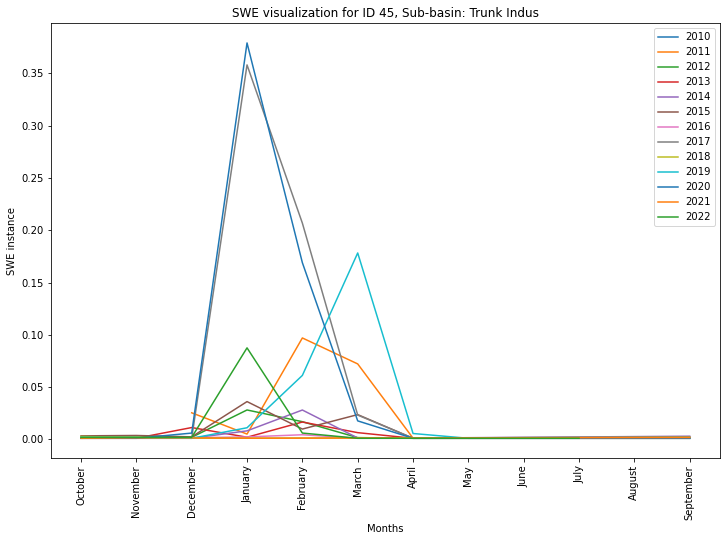

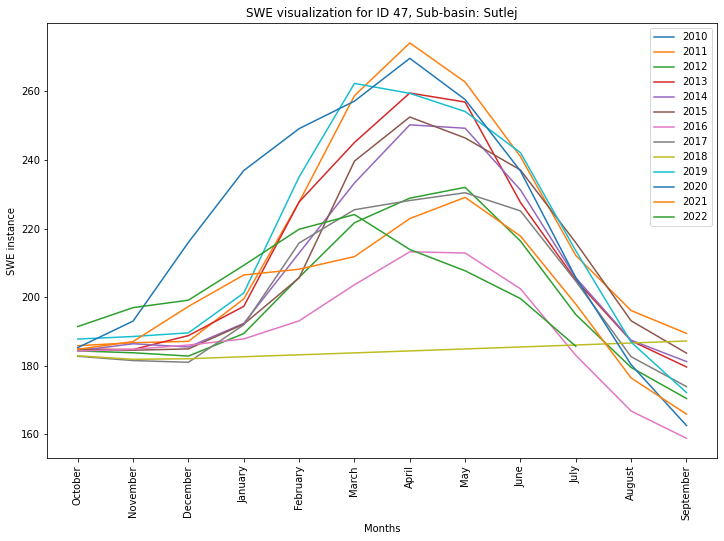

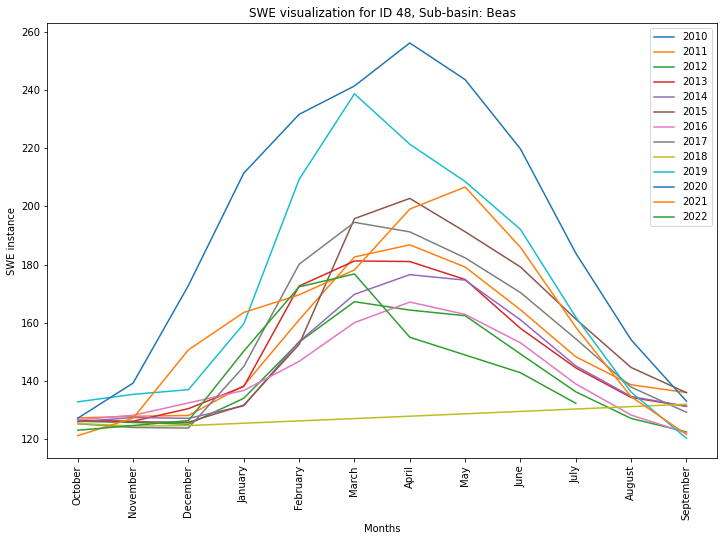

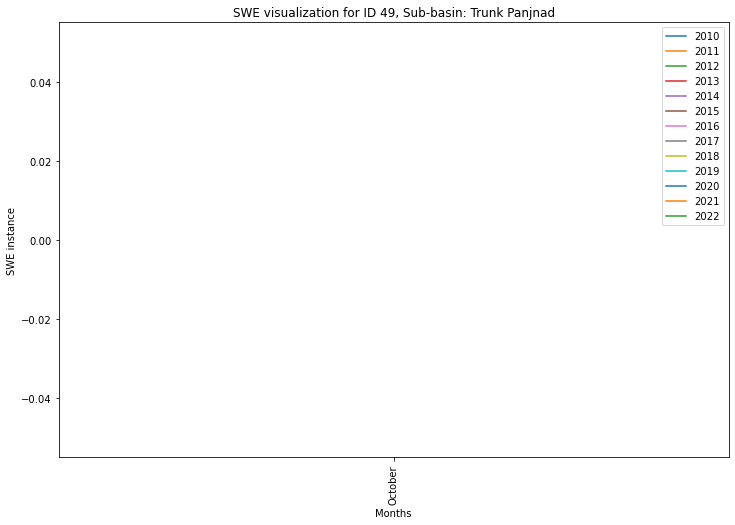

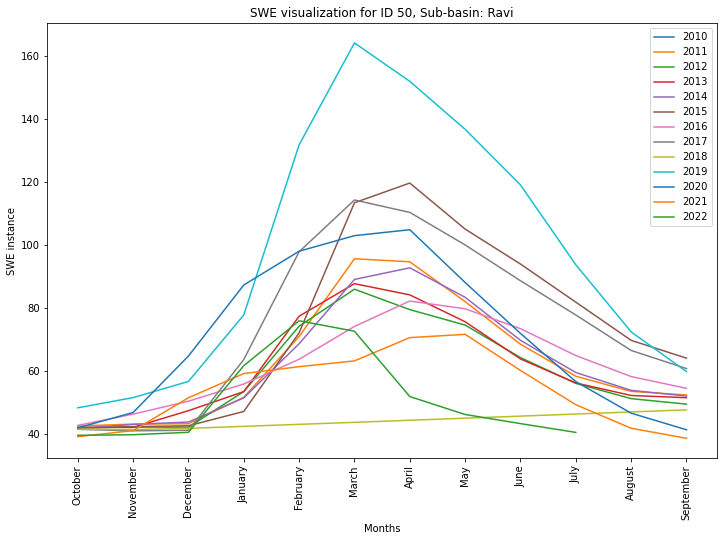

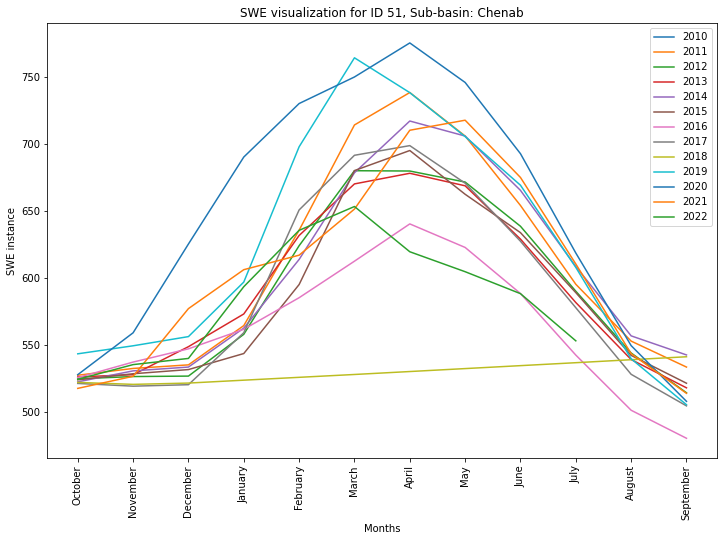

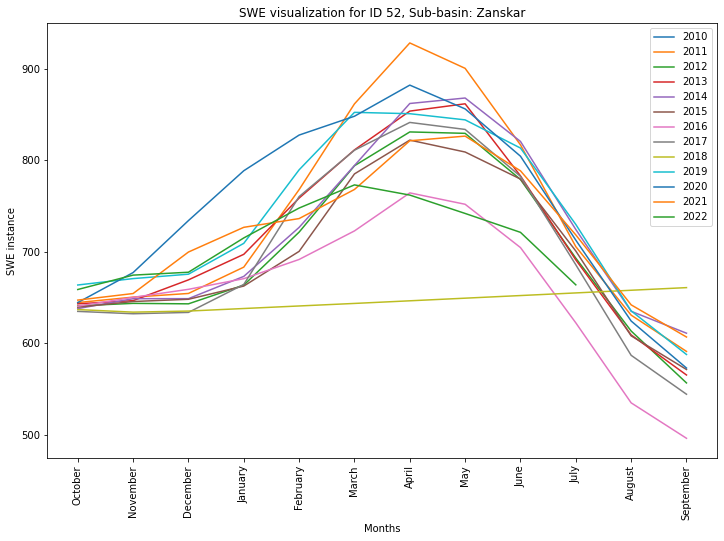

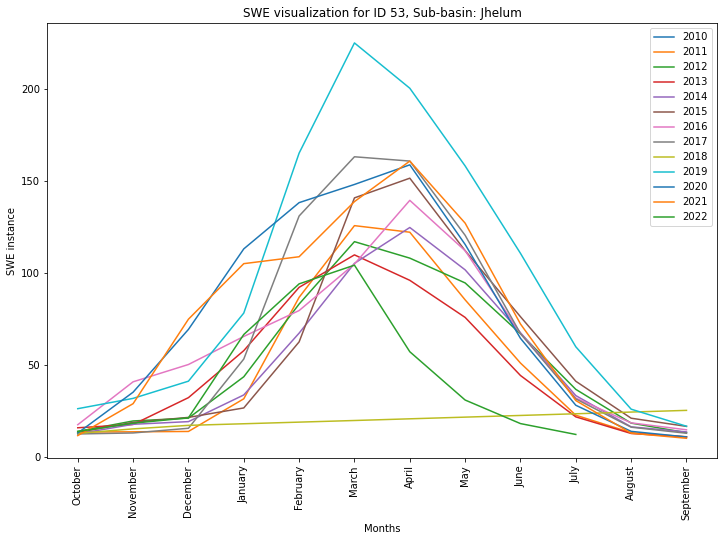

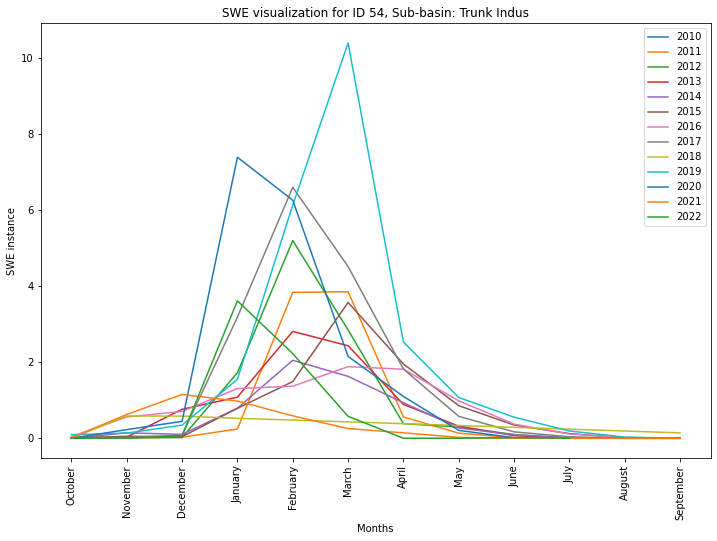

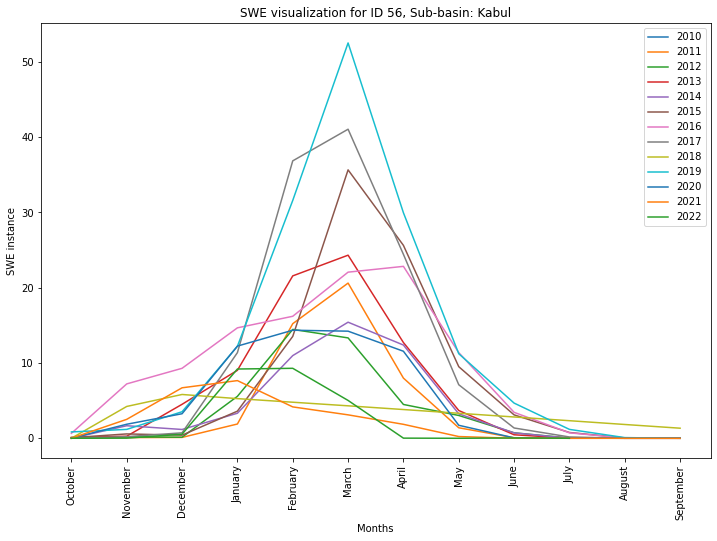

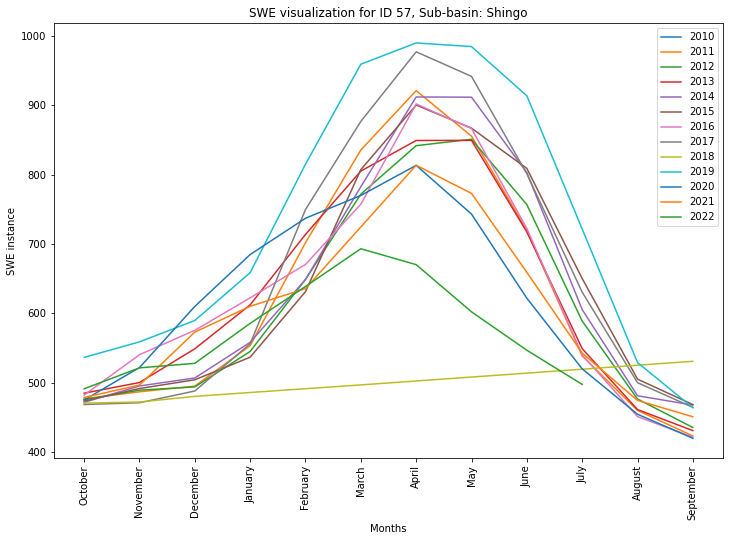

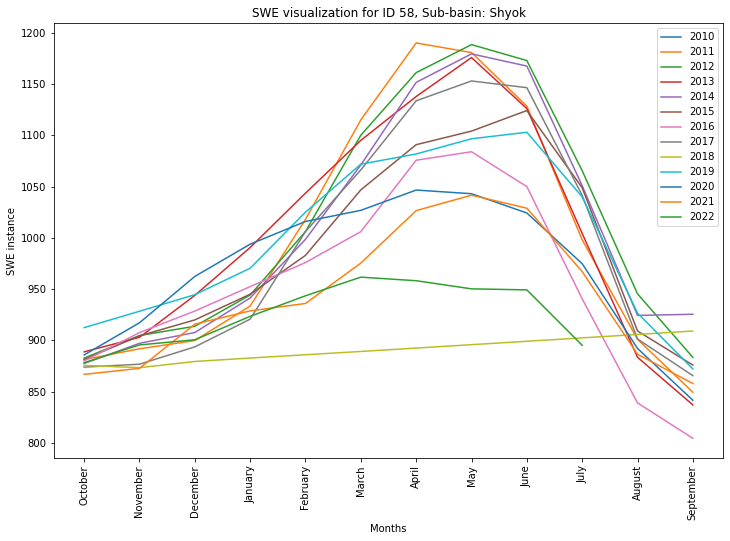

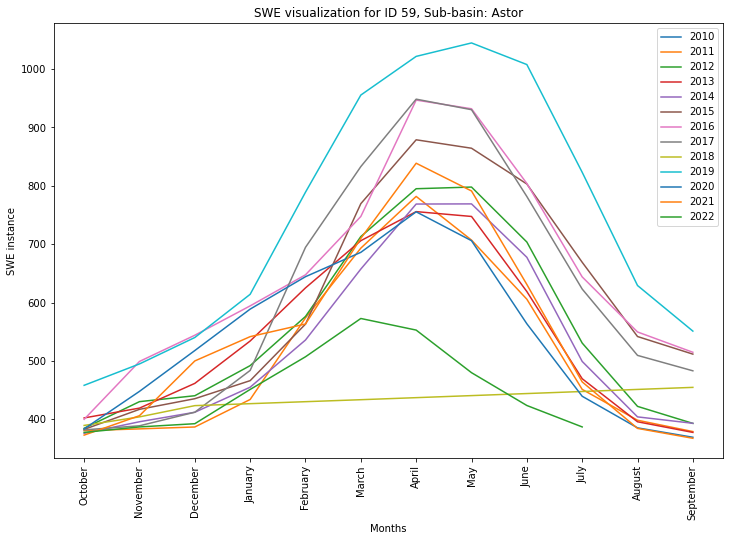

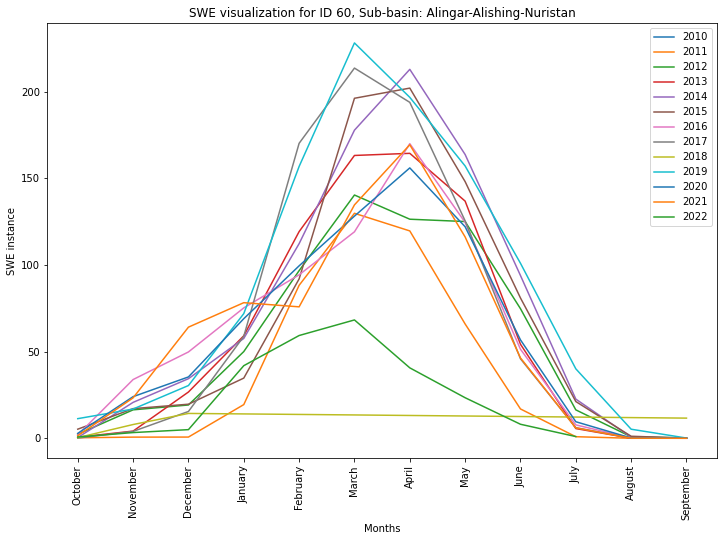

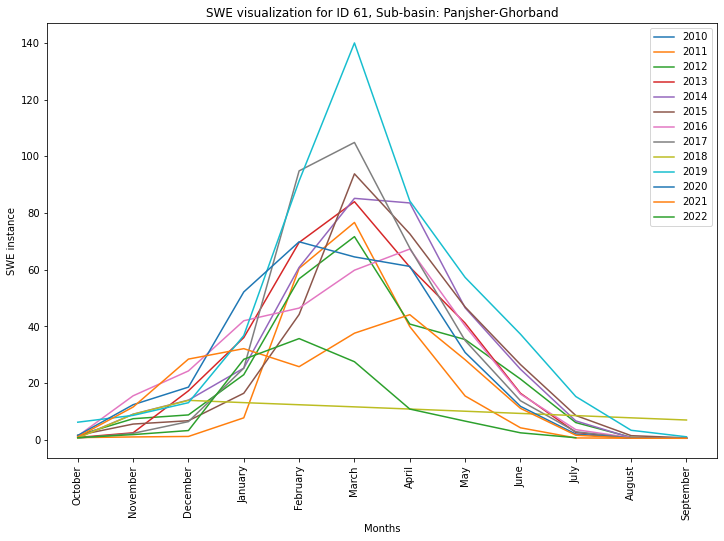

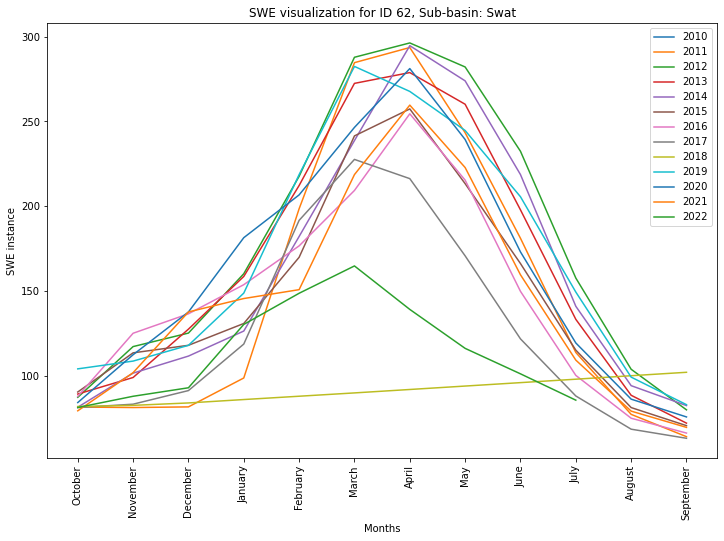

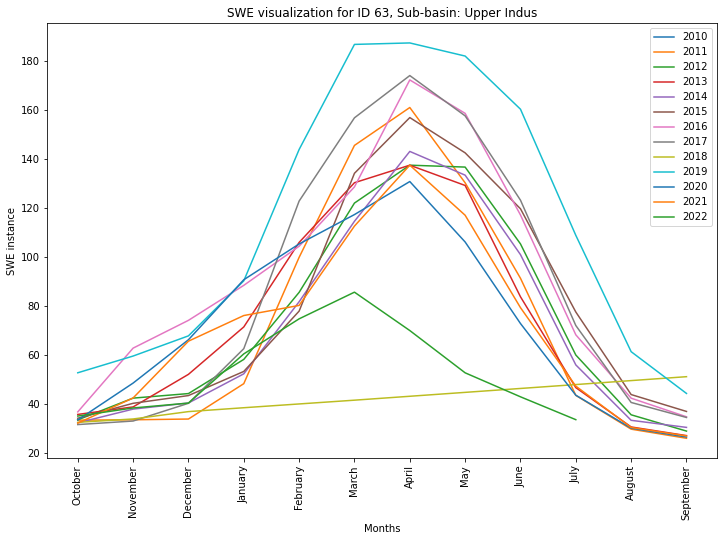

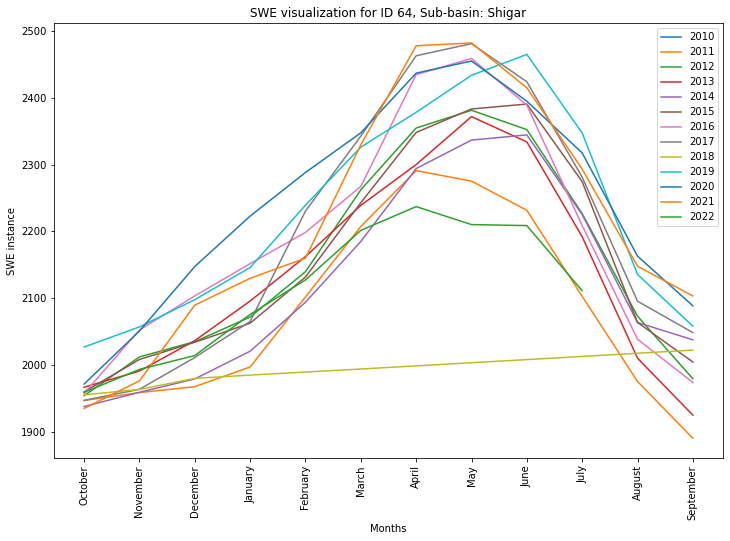

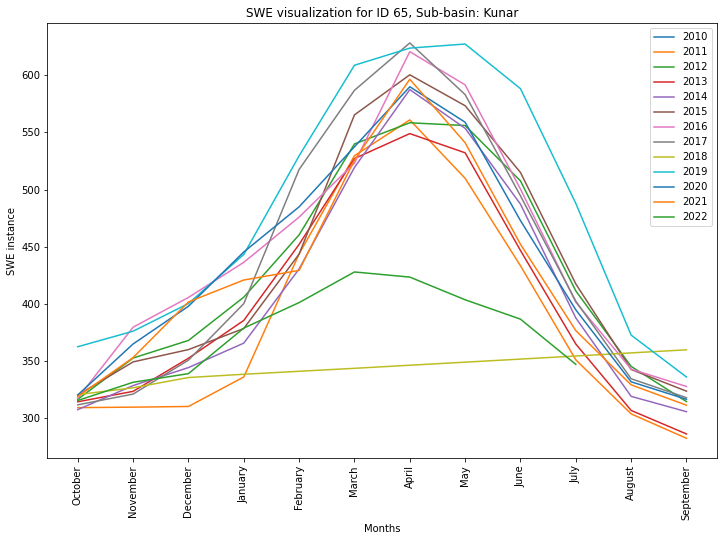

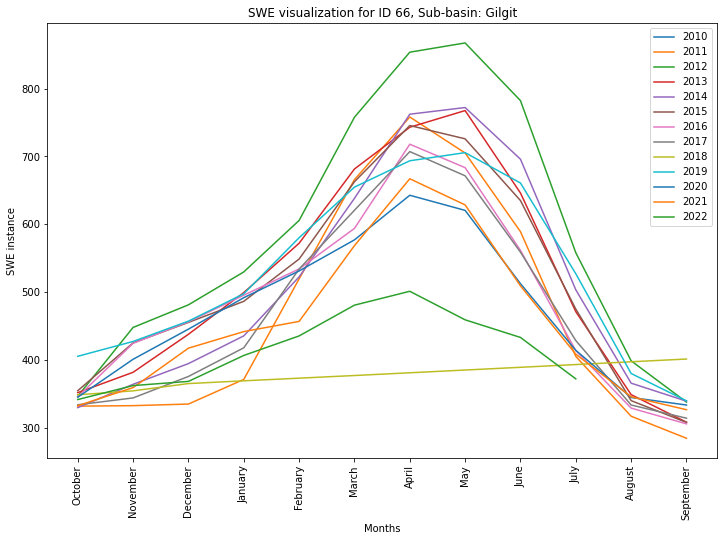

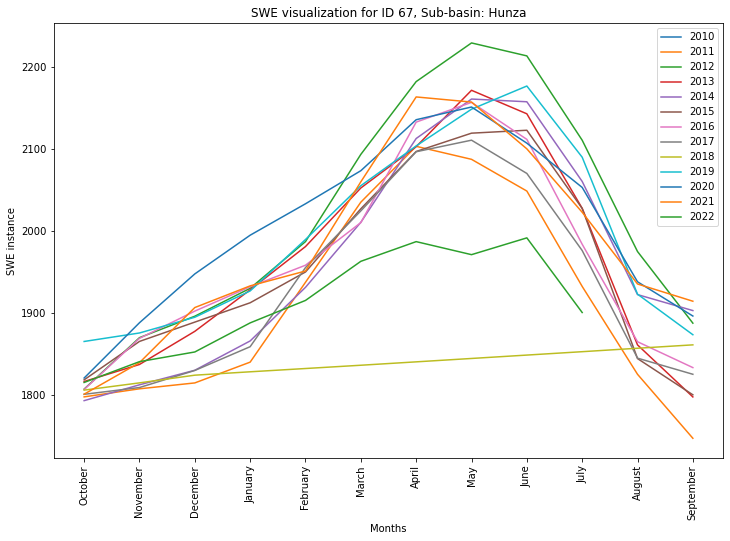

In [9]:
#Testing for two IDs in two year time for data only from required years (excluding Year 2018 and Year 2022)

for i in swe_indus_ids:
    id_check = swe_res_2011_2022[swe_res_2011_2022["ID"]== i]
    id_name_check = shp_indus[shp_indus["ID"]==i]
    l3_name = id_name_check["L3_Name"].unique()
    
    plt.figure(figsize=(12,8))
    for year in swe_indus_year:
        #Year minus 1 [because the dataset folder name starting in year 2011 has 3 month data (oct, nov, dec) from 2010 as well]
        start_date = pd.to_datetime(str(year-1) + "-10-1")
        end_date = pd.to_datetime(str(year) + "-9-30")

        year1 = id_check[(id_check['Date'] >= start_date) & (id_check['Date'] <= end_date)]

        x = year1["Month_name"]
        y1 = year1["Mean"]
        
        plt.plot(x, y1, label=str(year))
        plt.title("SWE visualization for ID {}".format(i) + ', ' + "Sub-basin: " + str(l3_name[0]))
        plt.xlabel("Months")
        plt.ylabel("SWE instance")
        plt.xticks(rotation = 90)
        plt.legend()
    

#### The dataset contains SWE data from Oct-2010 till August-2022,

In this step, 

- Here, we shall exclude year 2018 before computing the 10-year average (because of missing data)
- Also, we shall exclude the year 2022 (because we have the data till Sept 2022 and not the whole year around to have a complete 1 year data)
- NOTE: Also we get rid of first year on the list - Year 2010 (as the data contained in Year 2011 contains the 2010's last 3 months of the year)

In [10]:
# Making a list of years to exclude from computing 12-year average

swe_indus_year_off_list = [2010, 2018, 2022]
swe_indus_year_off = np.array(swe_indus_year_off_list)

In [11]:
# Get list of only required years from the original list of years (years between 2010 to 2022)
only_req_years = [x for x in swe_indus_year if x not in swe_indus_year_off]
only_req_years

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019, 2020, 2021]

##### Plotting the SWE time-series for each sub-basin

- Without y-limits on the y-axis of plots

C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_30956\1163662848.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


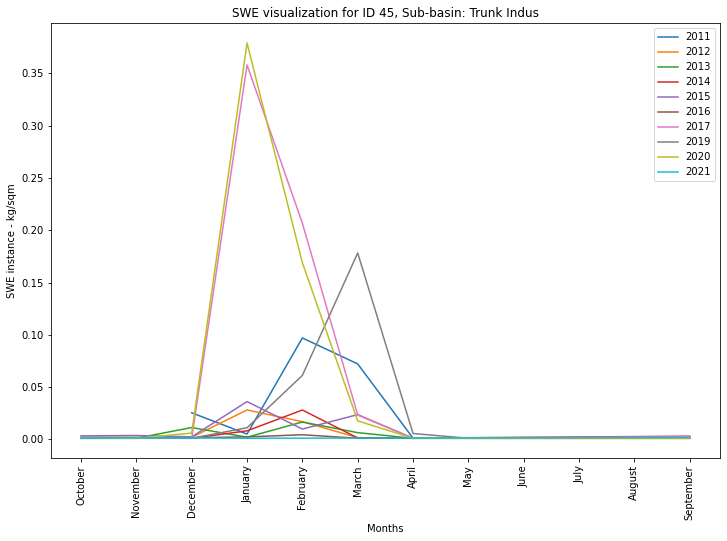

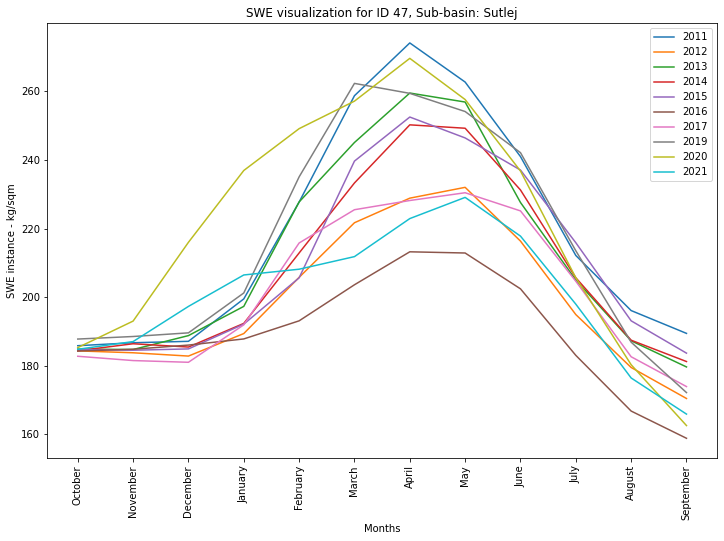

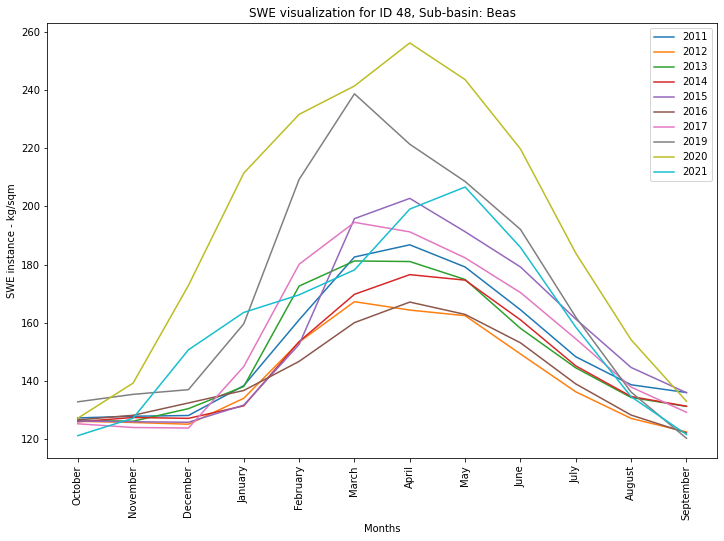

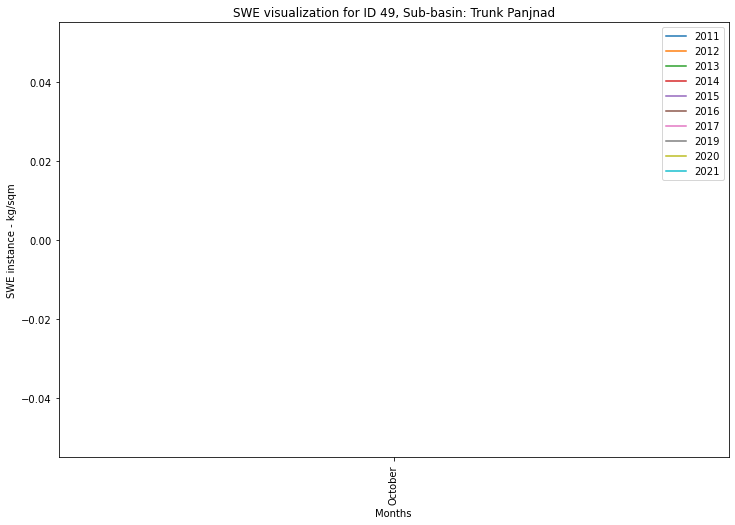

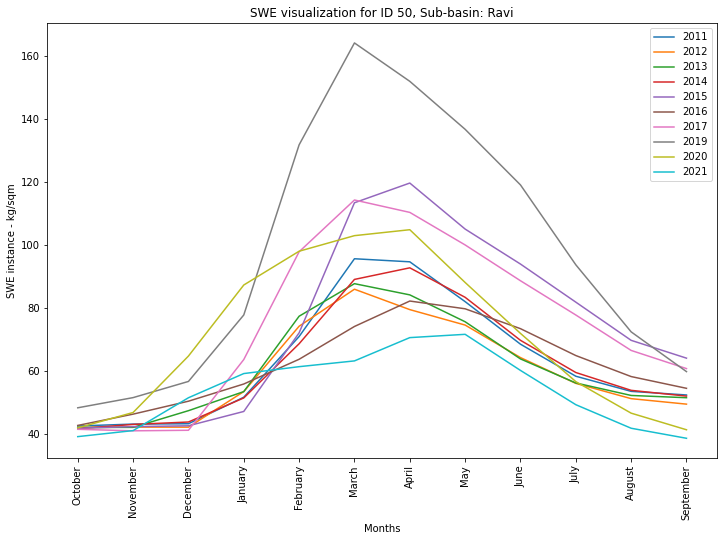

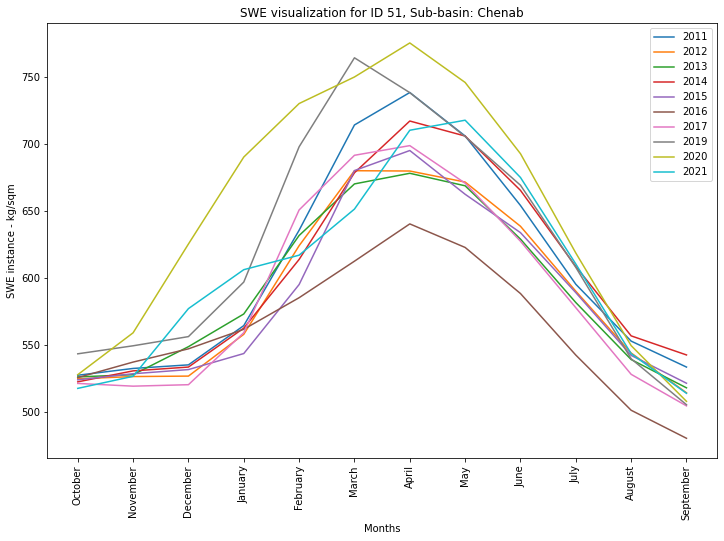

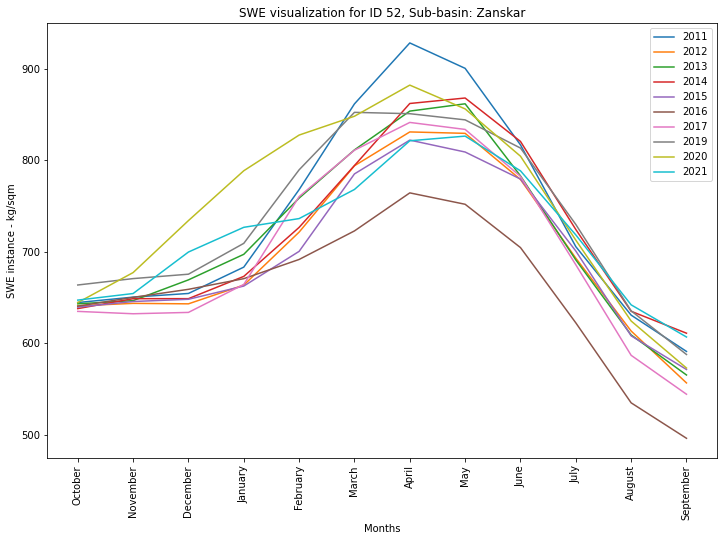

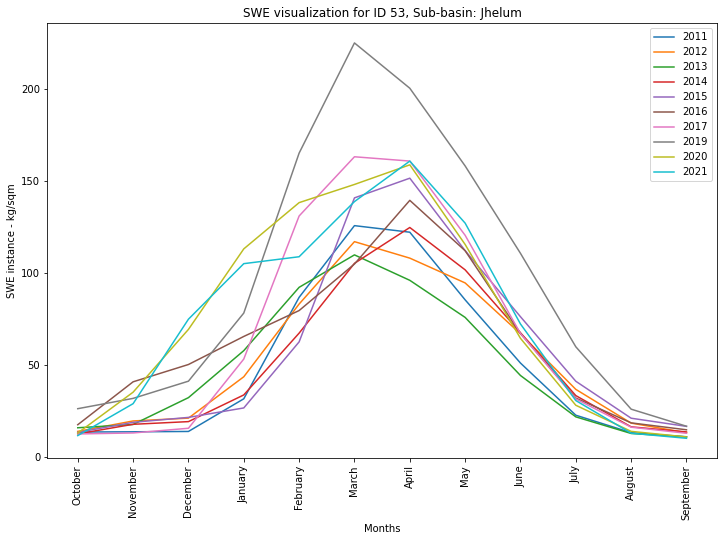

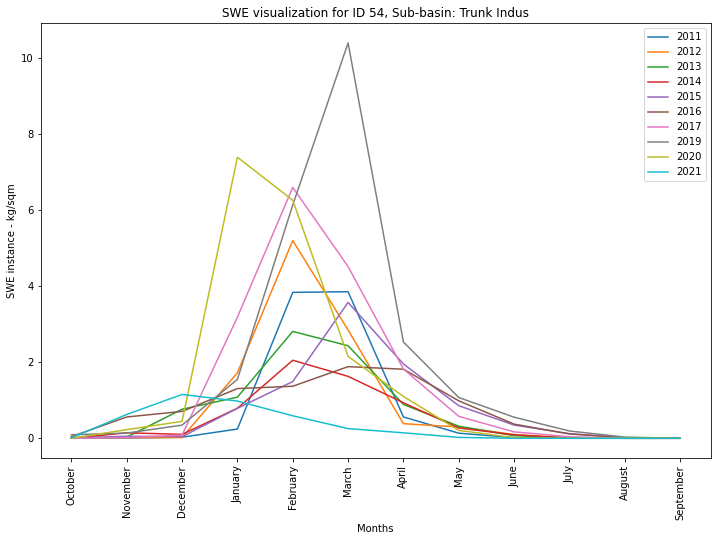

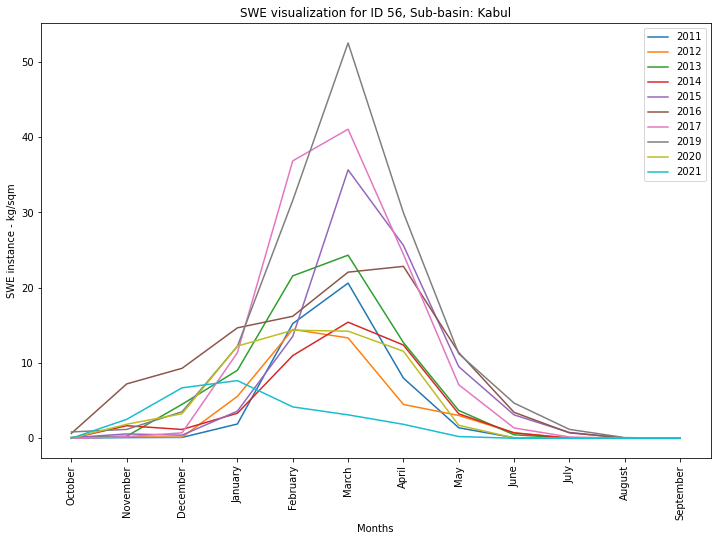

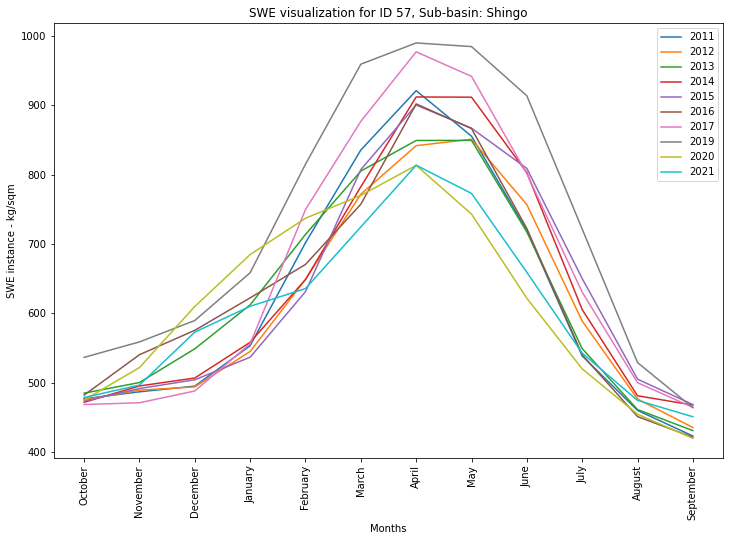

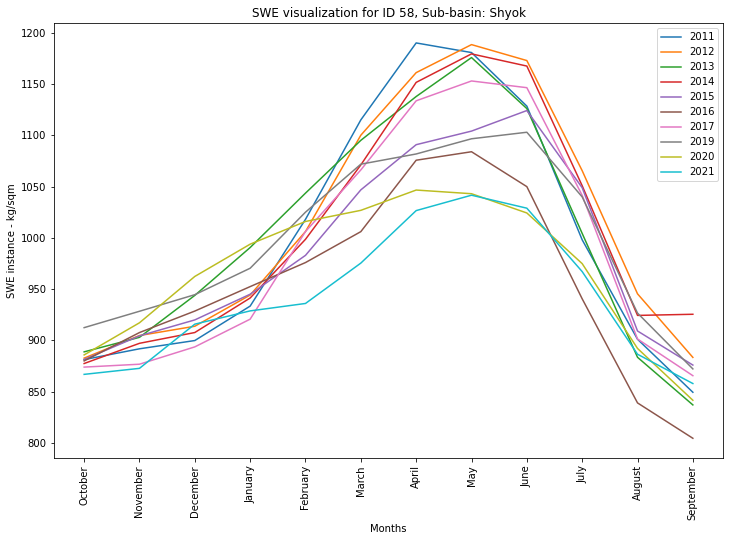

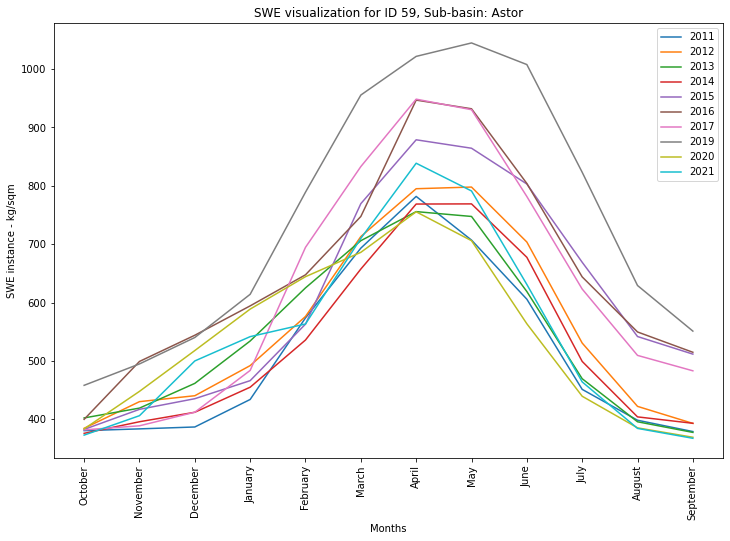

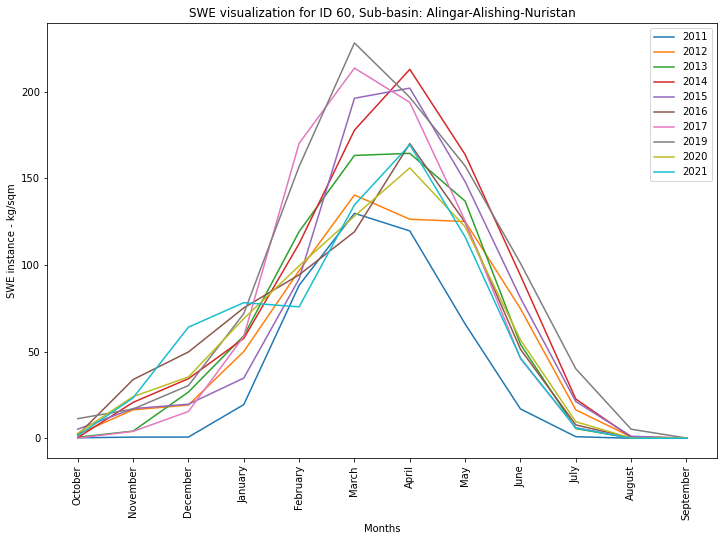

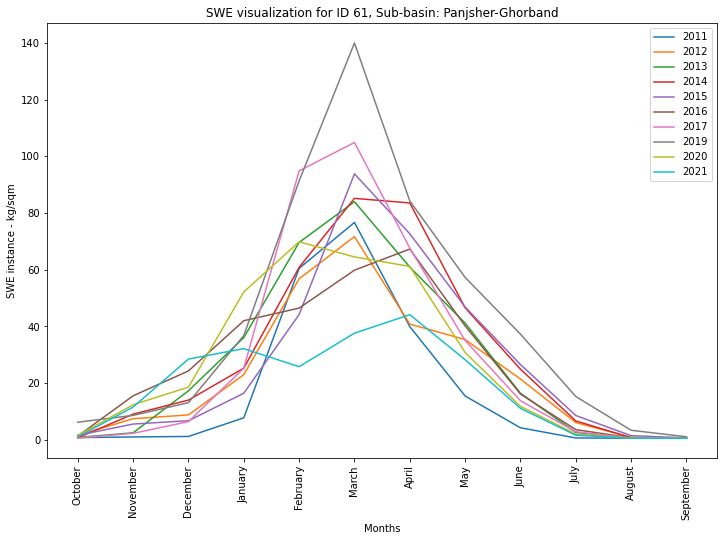

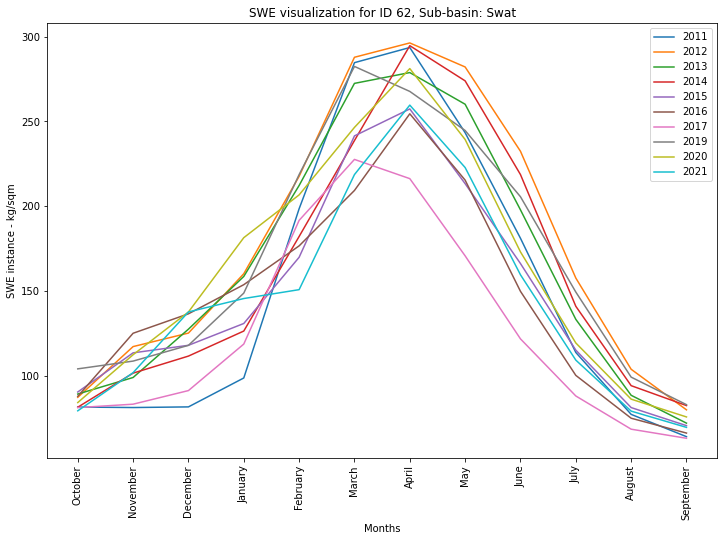

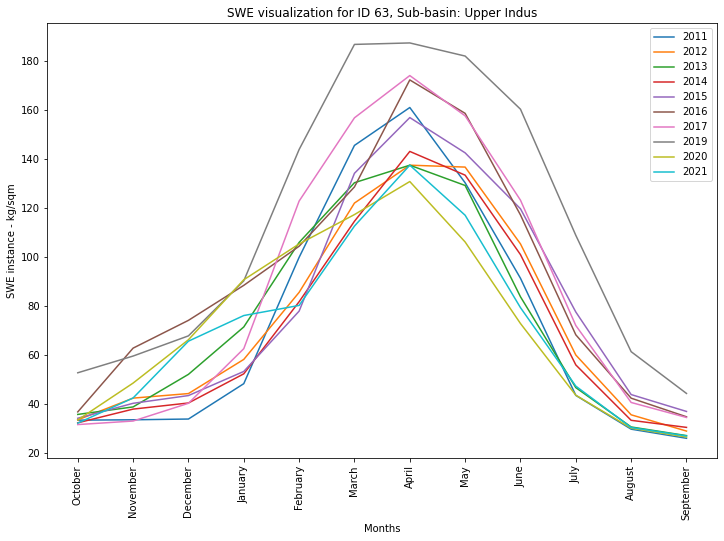

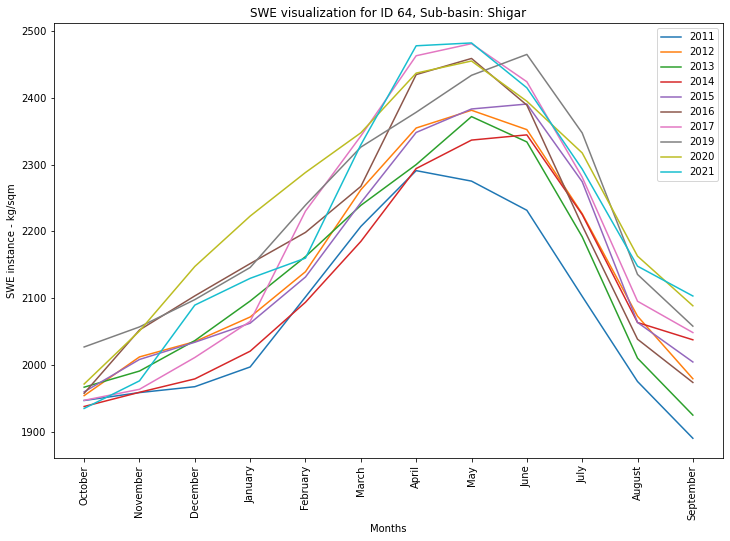

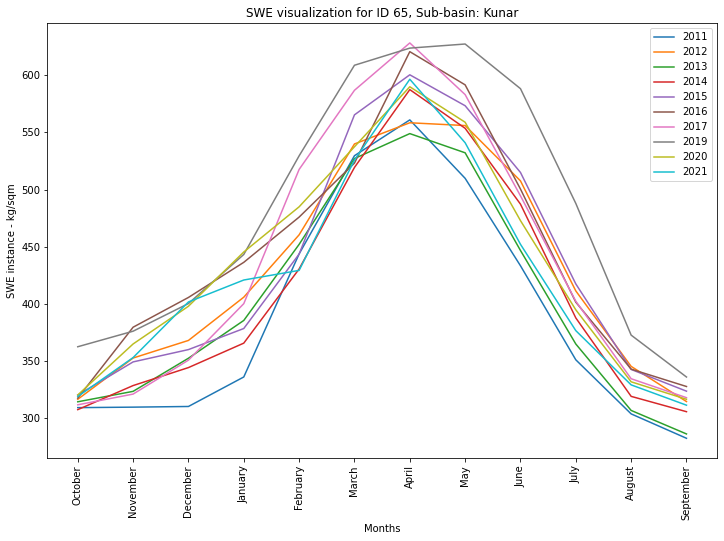

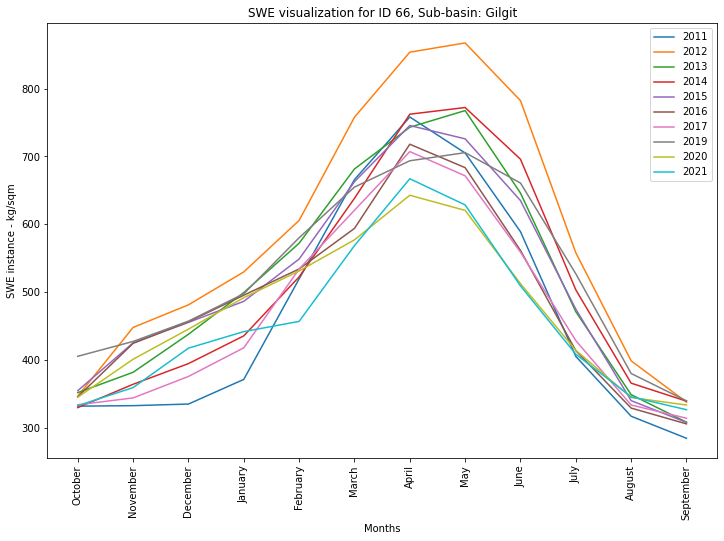

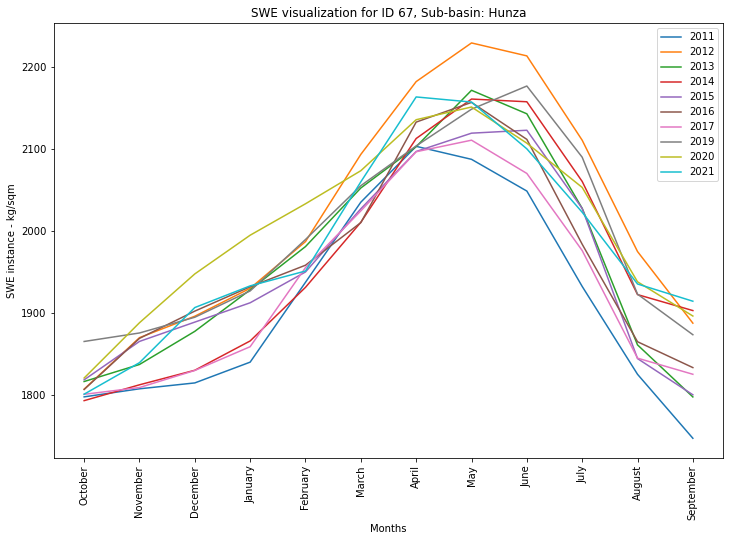

In [12]:
#Testing for two IDs in two year time for data only from required years (excluding Year 2018 and Year 2022)

for i in swe_indus_ids:
    id_check = swe_res_2011_2022[swe_res_2011_2022["ID"]== i]
    id_name_check = shp_indus[shp_indus["ID"]==i]
    l3_name = id_name_check["L3_Name"].unique()

    plt.figure(figsize=(12,8))
    for year in only_req_years:
        #Year minus 1 [because the dataset folder name starting in year 2011 has 3 month data (oct, nov, dec) from 2010 as well]
        start_date = pd.to_datetime(str(year-1) + "-10-1")
        end_date = pd.to_datetime(str(year) + "-9-30")
        year1 = id_check[(id_check['Date'] >= start_date) & (id_check['Date'] <= end_date)]
        x = year1["Month_name"]
        y1 = year1["Mean"]

        plt.plot(x, y1, label=str(year))
        plt.title("SWE visualization for ID {}".format(i) + ', ' + "Sub-basin: " + str(l3_name[0]))
        plt.xlabel("Months")
        plt.ylabel("SWE instance - kg/sqm")
        plt.xticks(rotation = 90)
        plt.legend()

#### Compute 10-year average trend and Check Anomaly

##### Plotting the SWE time-series for each sub-basin

- Without y-limits on the y-axis of plots

C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_30956\4080461573.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


<Figure size 864x576 with 0 Axes>

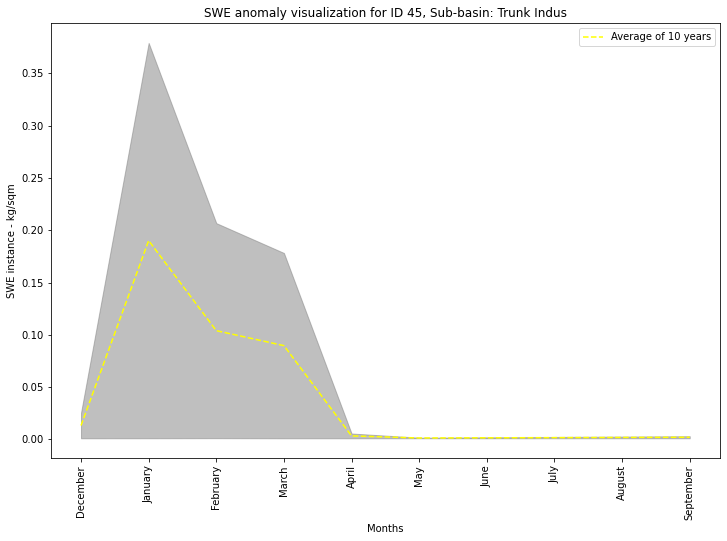

<Figure size 864x576 with 0 Axes>

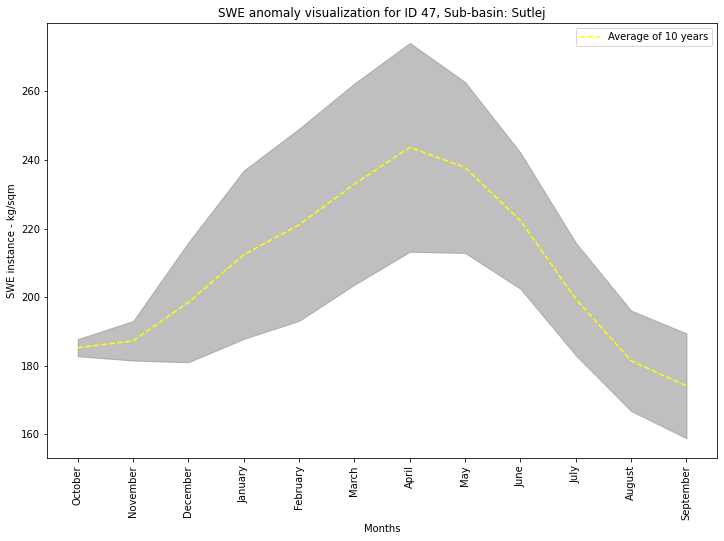

<Figure size 864x576 with 0 Axes>

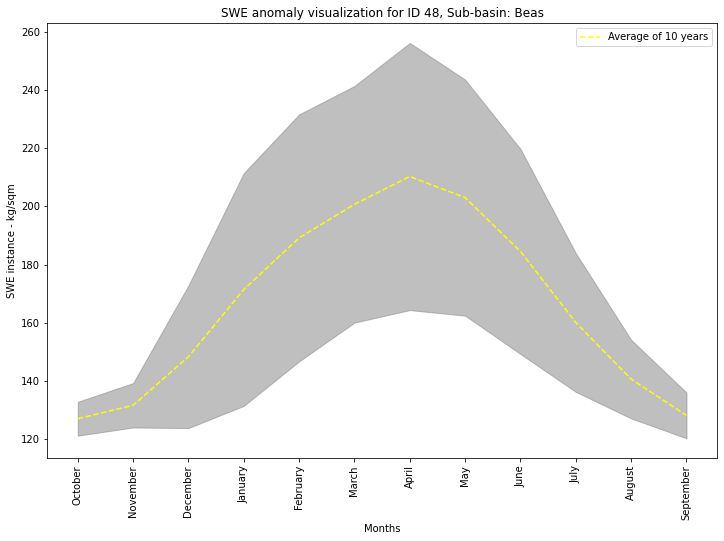

<Figure size 864x576 with 0 Axes>

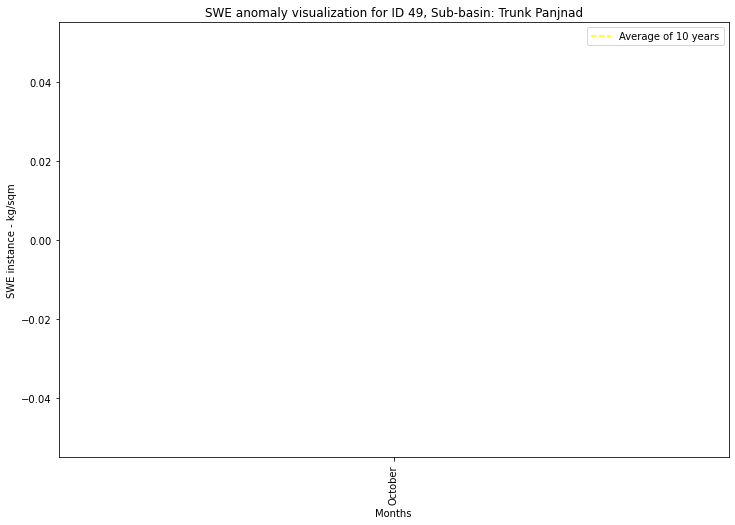

<Figure size 864x576 with 0 Axes>

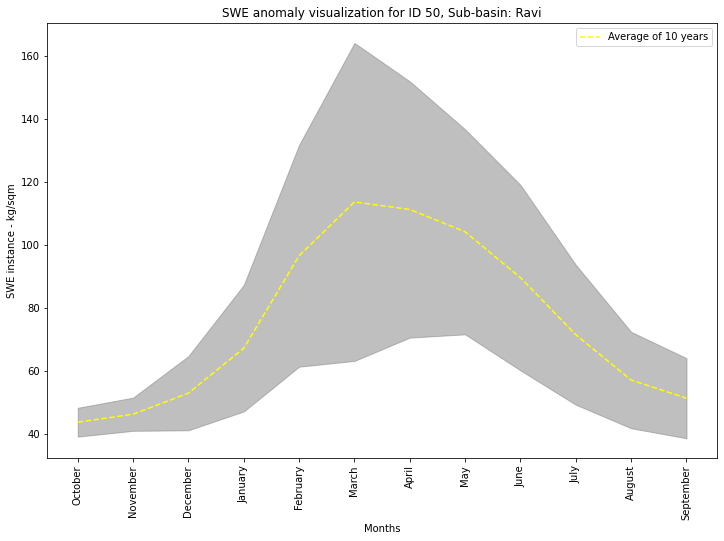

<Figure size 864x576 with 0 Axes>

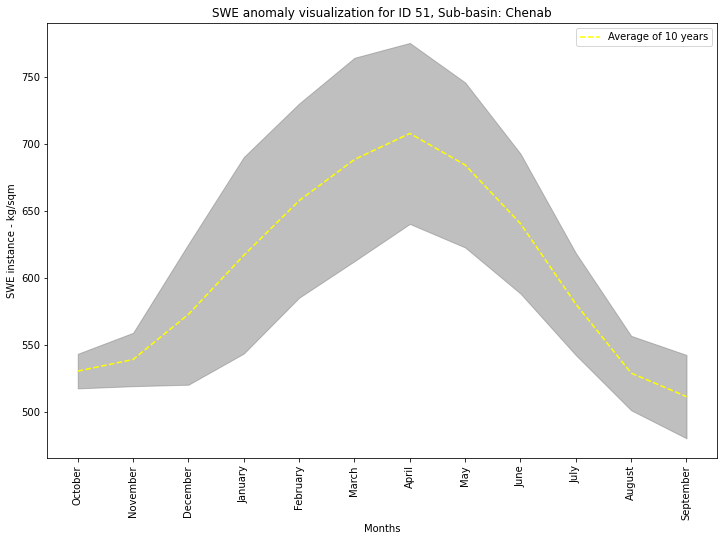

<Figure size 864x576 with 0 Axes>

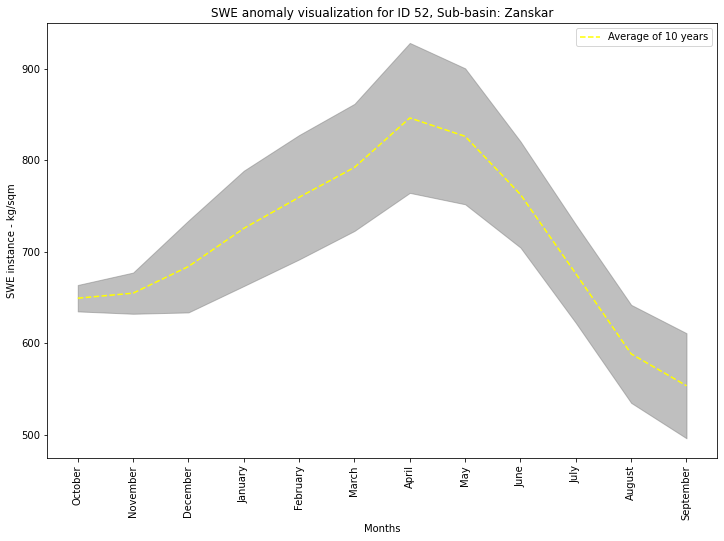

<Figure size 864x576 with 0 Axes>

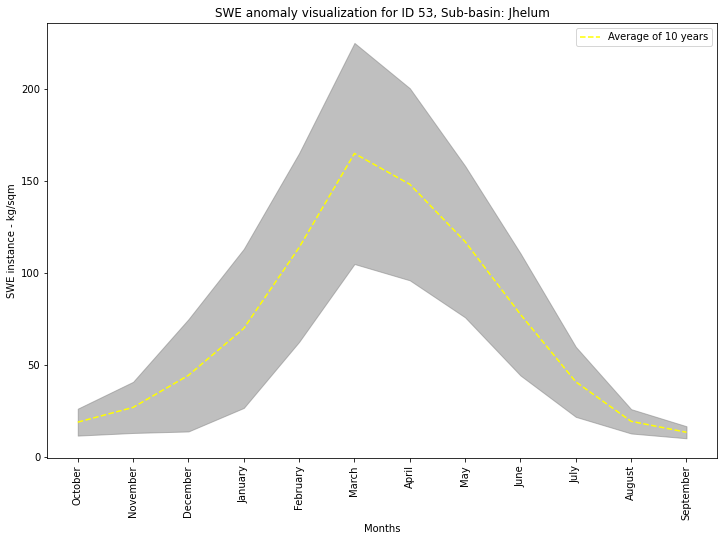

<Figure size 864x576 with 0 Axes>

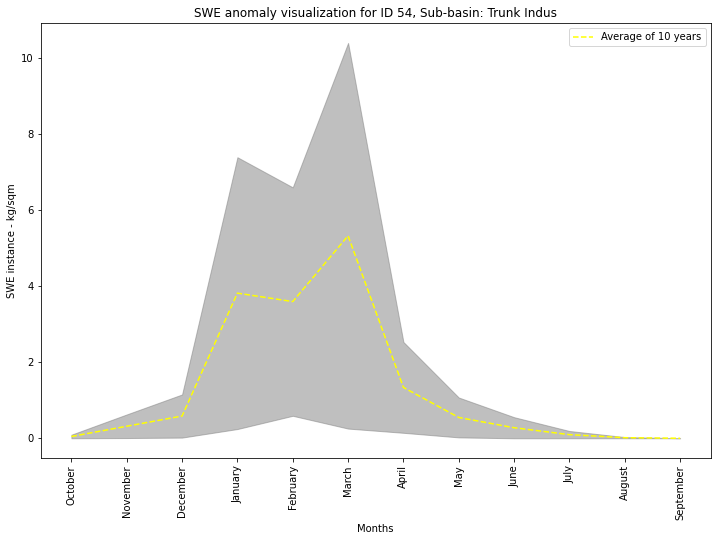

<Figure size 864x576 with 0 Axes>

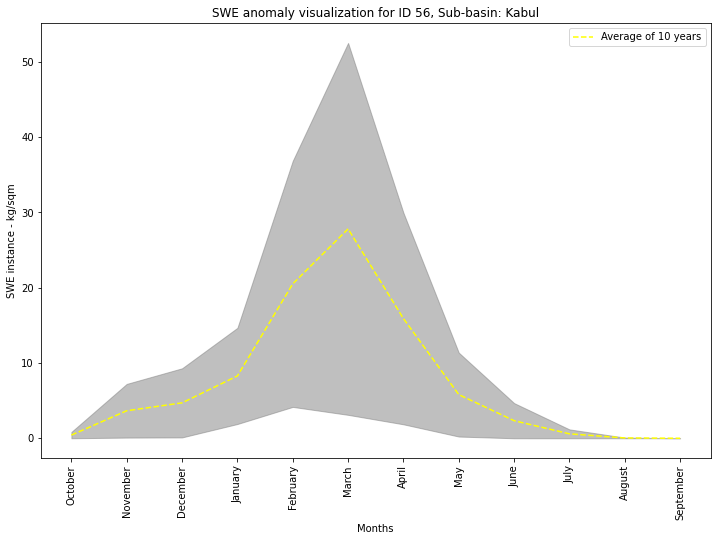

<Figure size 864x576 with 0 Axes>

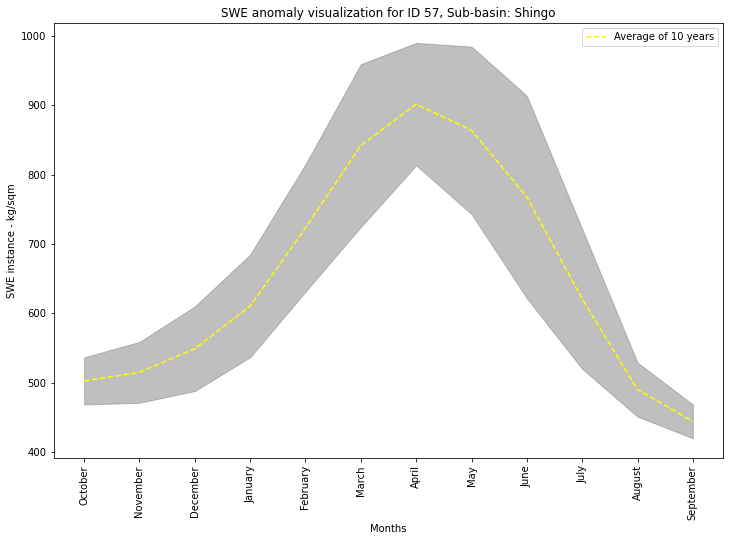

<Figure size 864x576 with 0 Axes>

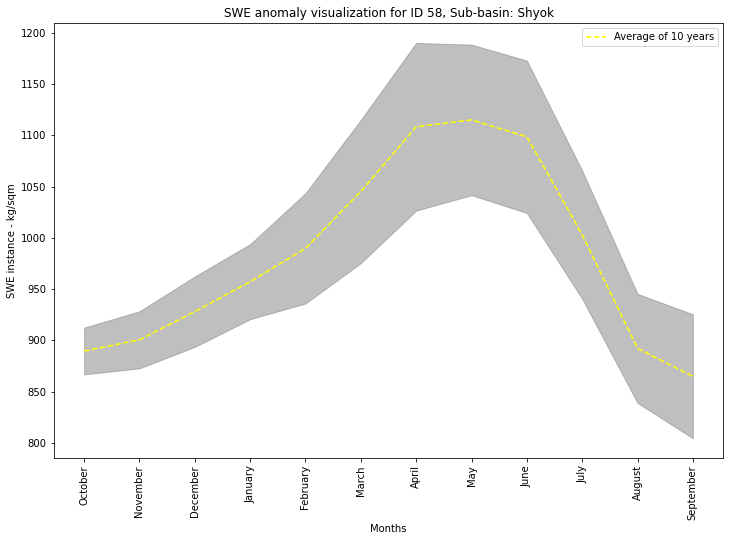

<Figure size 864x576 with 0 Axes>

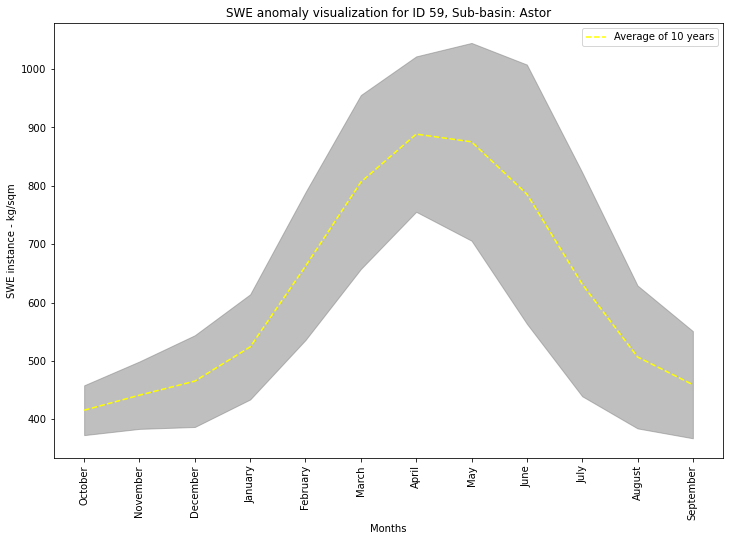

<Figure size 864x576 with 0 Axes>

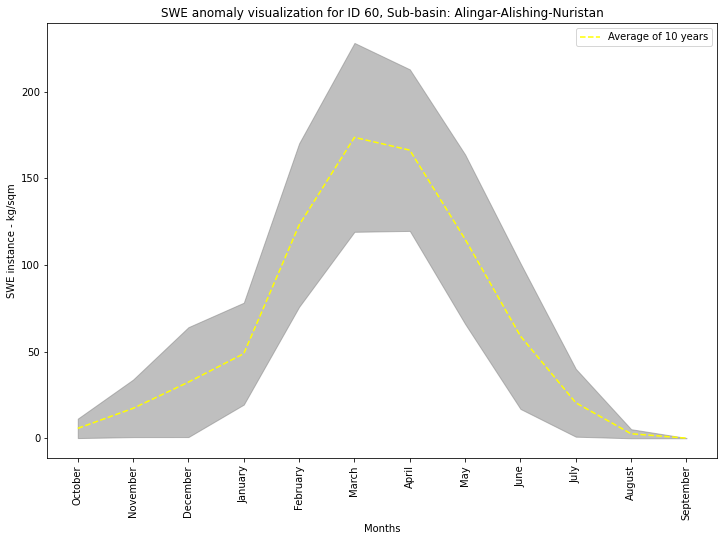

<Figure size 864x576 with 0 Axes>

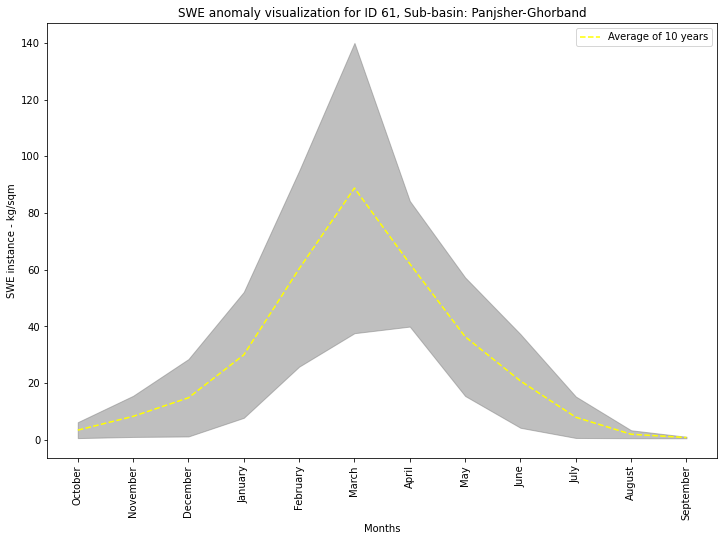

<Figure size 864x576 with 0 Axes>

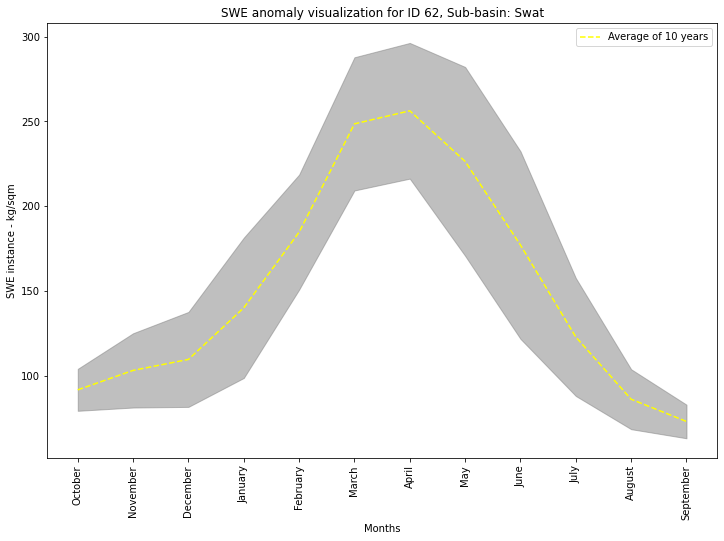

<Figure size 864x576 with 0 Axes>

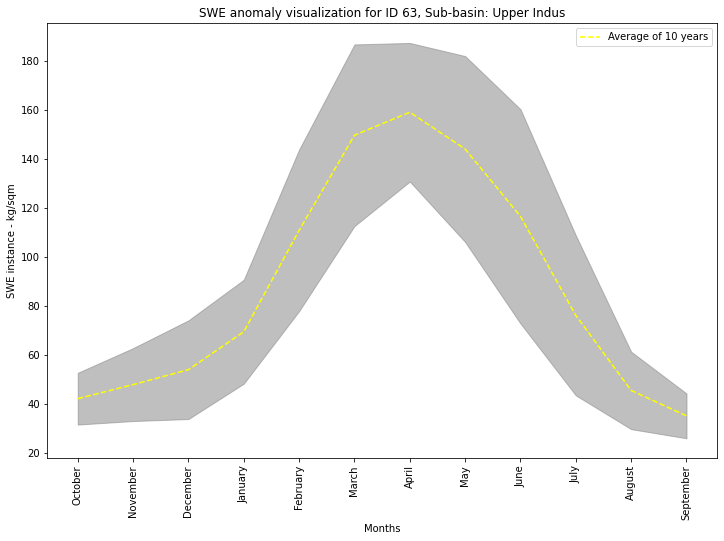

<Figure size 864x576 with 0 Axes>

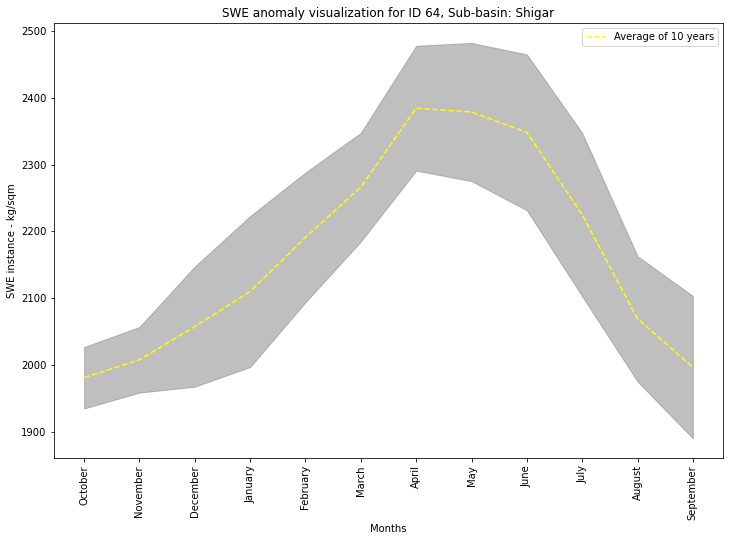

<Figure size 864x576 with 0 Axes>

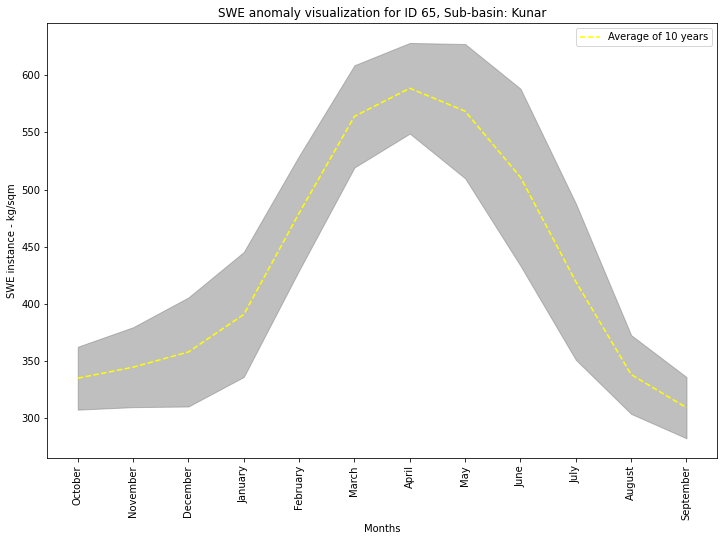

<Figure size 864x576 with 0 Axes>

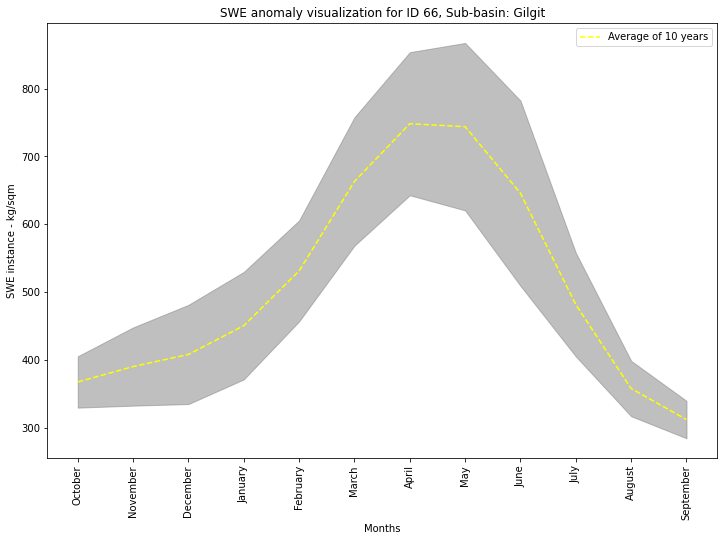

<Figure size 864x576 with 0 Axes>

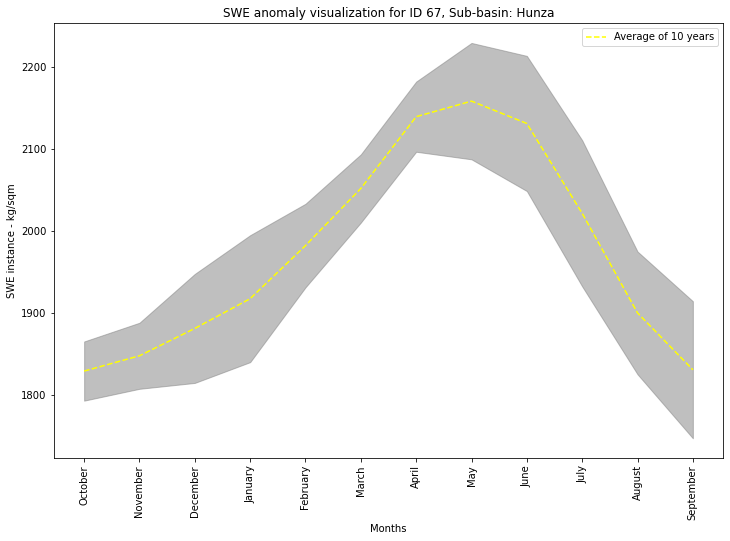

In [23]:
#For all IDs in 10 year time for data only from required years (excluding Year 2018 and Year 2022)

for i in swe_indus_ids:
    id_check = swe_res_2011_2022[swe_res_2011_2022["ID"]== i]
    plt.figure(figsize=(12,8))
    id_name_check = shp_indus[shp_indus["ID"]==i]
    l3_name = id_name_check["L3_Name"].unique()
    
    plt.figure(figsize=(12,8))
    
    temp_y = []
    
    for year in only_req_years:
        #Year minus 1 [because the dataset folder name starting in year 2011 has 3 month data (oct, nov, dec) from 2010 as well]
        start_date = pd.to_datetime(str(year-1) + "-10-1")
        end_date = pd.to_datetime(str(year) + "-9-30")
        
        year1 = id_check[(id_check['Date'] >= start_date) & (id_check['Date'] <= end_date)]
        x = year1["Month_name"]
        y1 = year1["Mean"]
        temp_y.append(list(y1))

    ###################################################
    
    plt.title("SWE anomaly visualization for ID {}".format(i) + ', ' + "Sub-basin: " + str(l3_name[0]))      
    y_min = np.minimum.reduce(temp_y)
    y_max = np.maximum.reduce(temp_y)
    y_avg = (y_min + y_max)/2
    
#     ana_y = y22_arr - y_avg
    plt.plot(x, y_avg, color='yellow', label= "Average of {}".format(len(only_req_years)) + ' years', linestyle ='--')
    
    plt.fill_between(x, y_min, y_max, color='grey', alpha=0.5)
    plt.xlabel("Months")
    plt.ylabel("SWE instance - kg/sqm")
    plt.xticks(rotation = 90)
    plt.legend() 

##### Plotting the ANOMALY for Entered Year: SWE time-series for each sub-basin

C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_30956\2712076562.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


<Figure size 864x576 with 0 Axes>

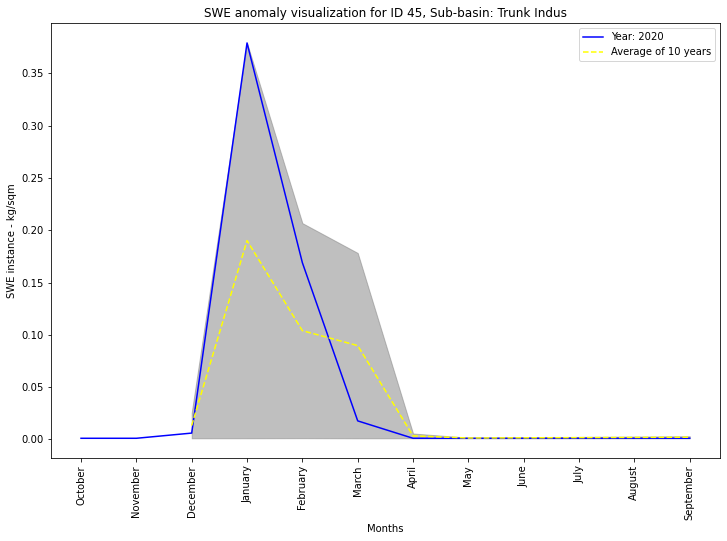

<Figure size 864x576 with 0 Axes>

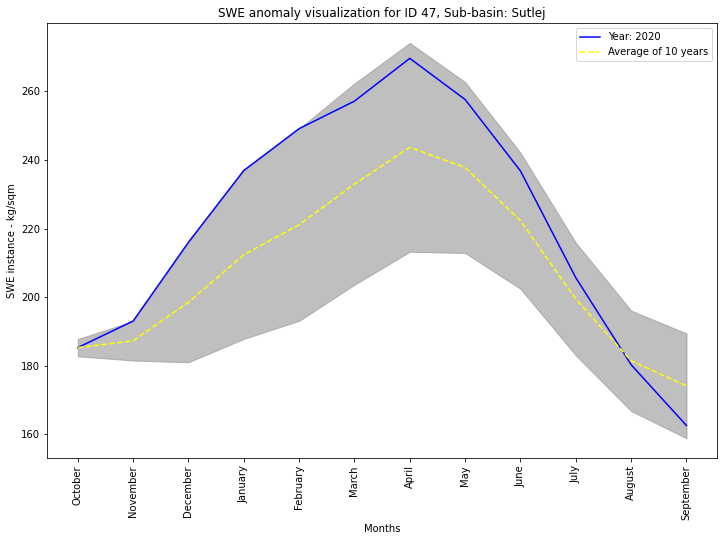

<Figure size 864x576 with 0 Axes>

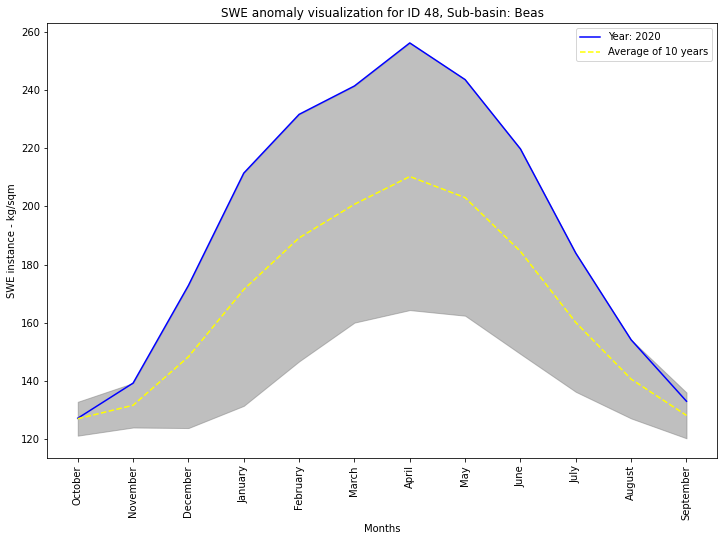

<Figure size 864x576 with 0 Axes>

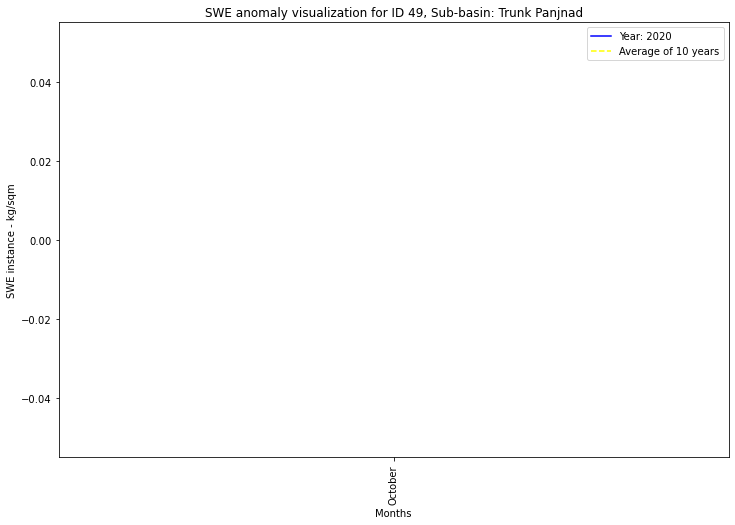

<Figure size 864x576 with 0 Axes>

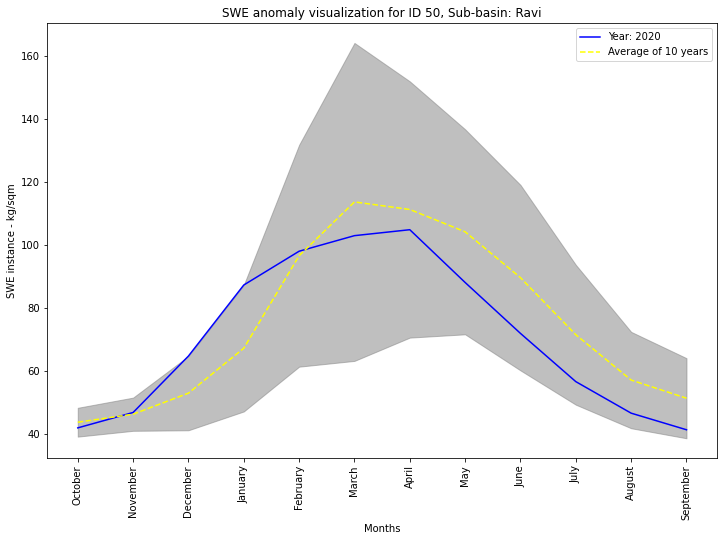

<Figure size 864x576 with 0 Axes>

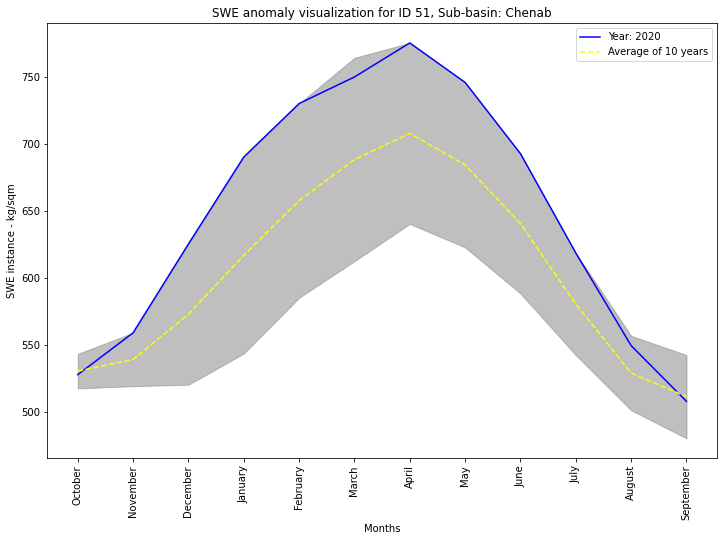

<Figure size 864x576 with 0 Axes>

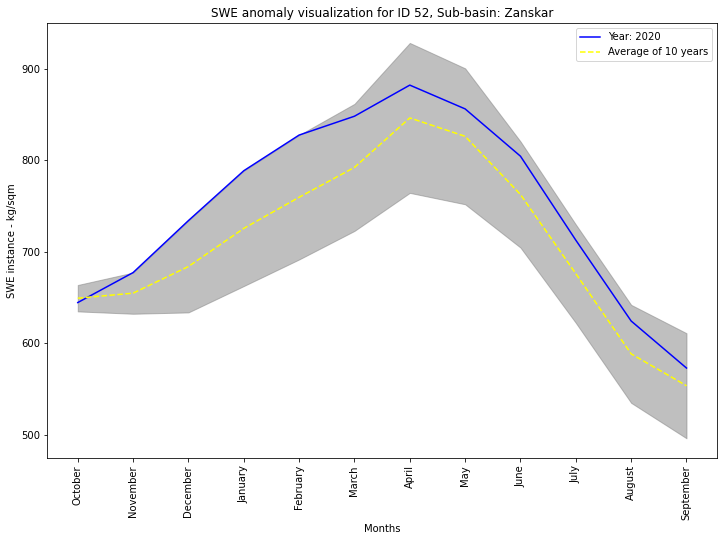

<Figure size 864x576 with 0 Axes>

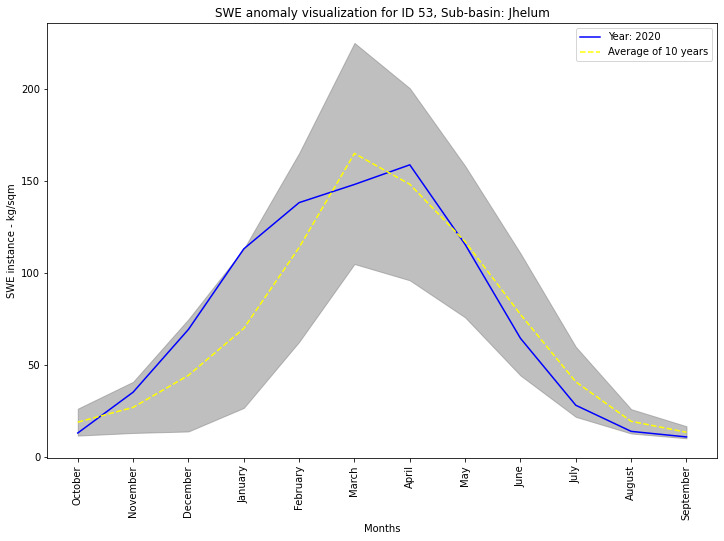

<Figure size 864x576 with 0 Axes>

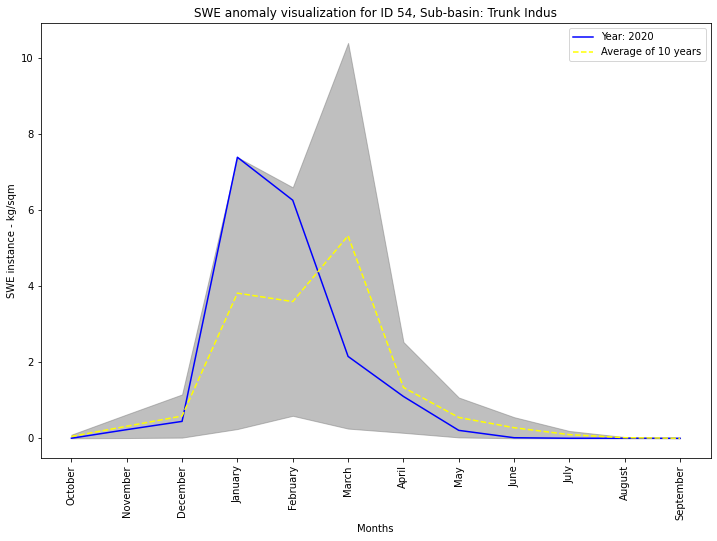

<Figure size 864x576 with 0 Axes>

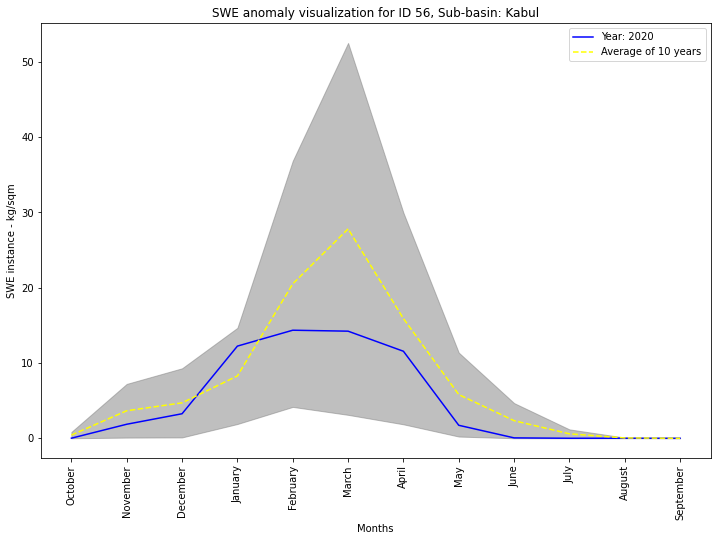

<Figure size 864x576 with 0 Axes>

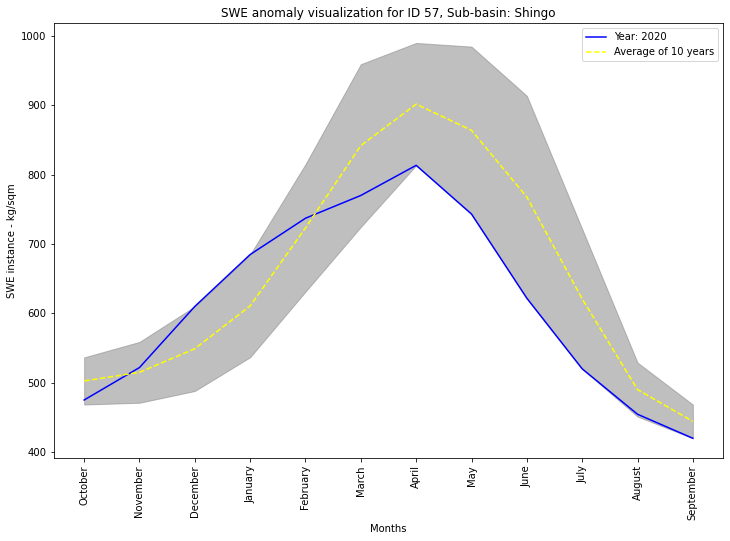

<Figure size 864x576 with 0 Axes>

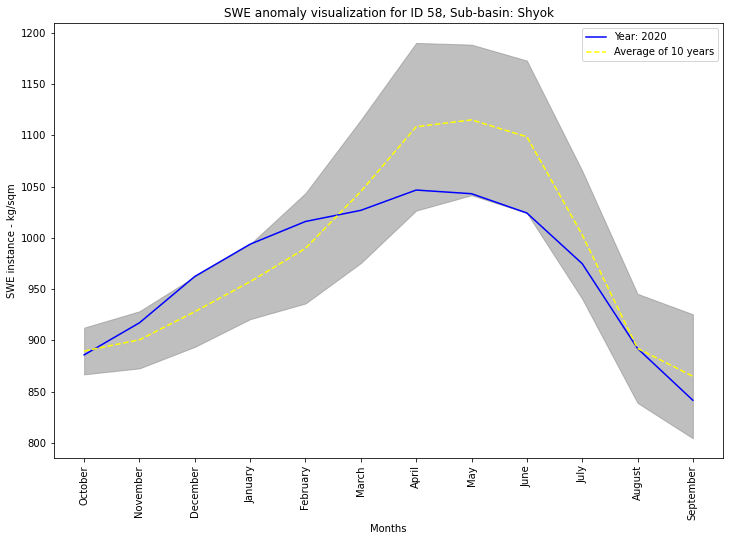

<Figure size 864x576 with 0 Axes>

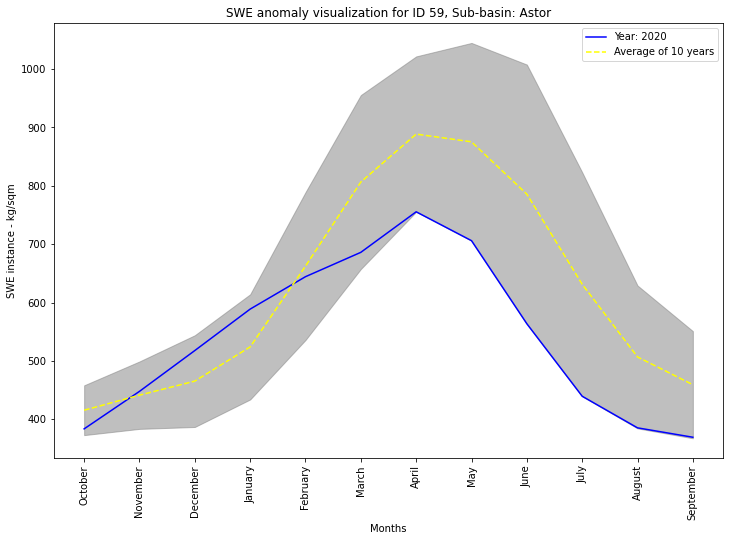

<Figure size 864x576 with 0 Axes>

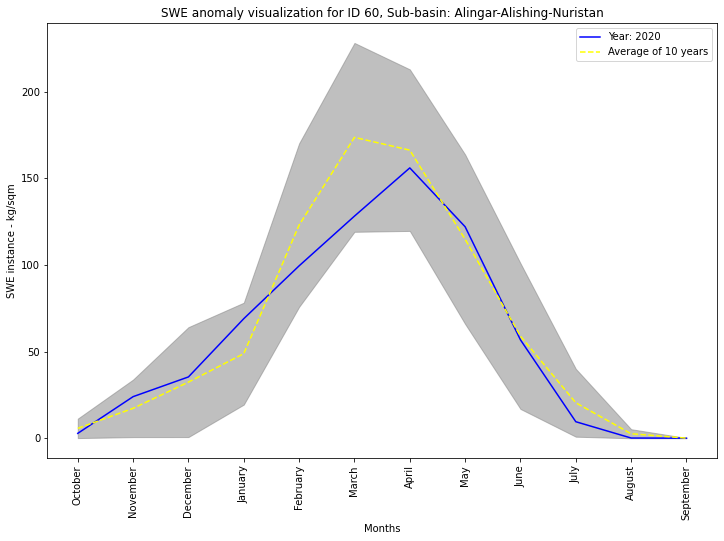

<Figure size 864x576 with 0 Axes>

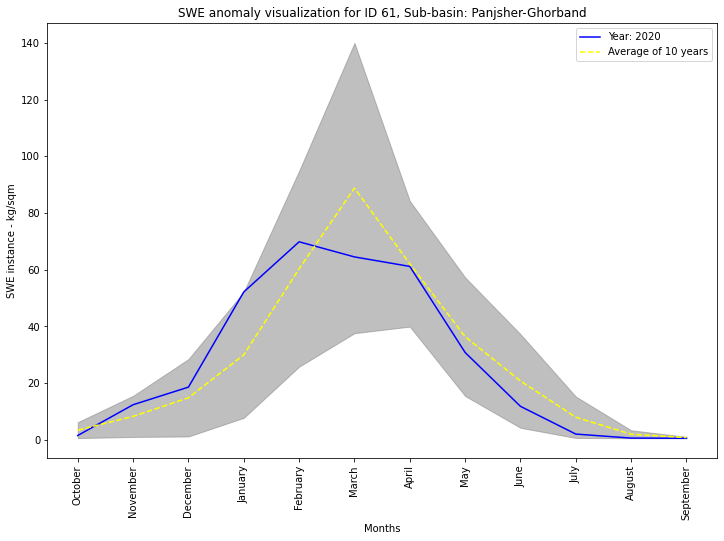

<Figure size 864x576 with 0 Axes>

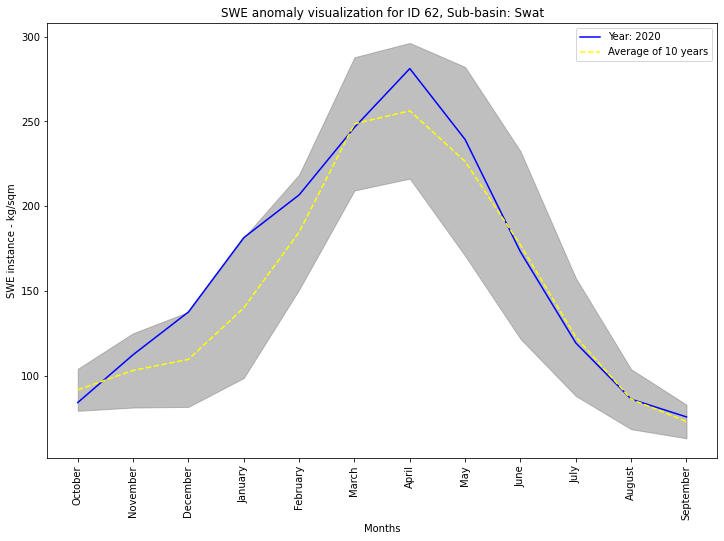

<Figure size 864x576 with 0 Axes>

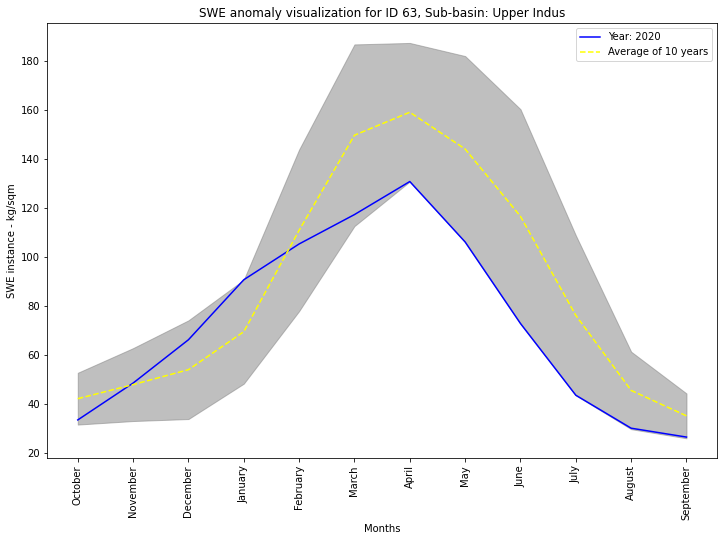

<Figure size 864x576 with 0 Axes>

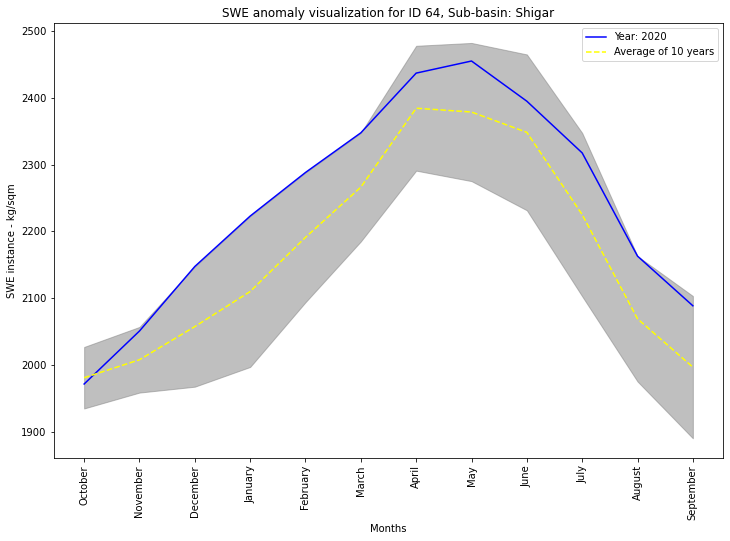

<Figure size 864x576 with 0 Axes>

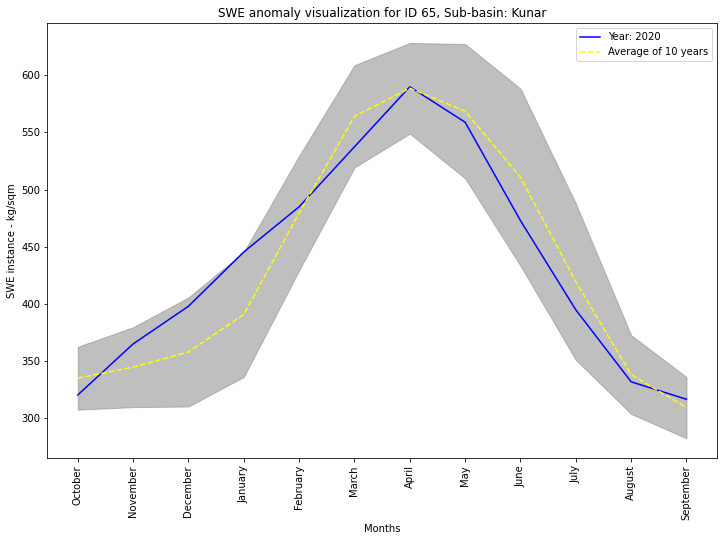

<Figure size 864x576 with 0 Axes>

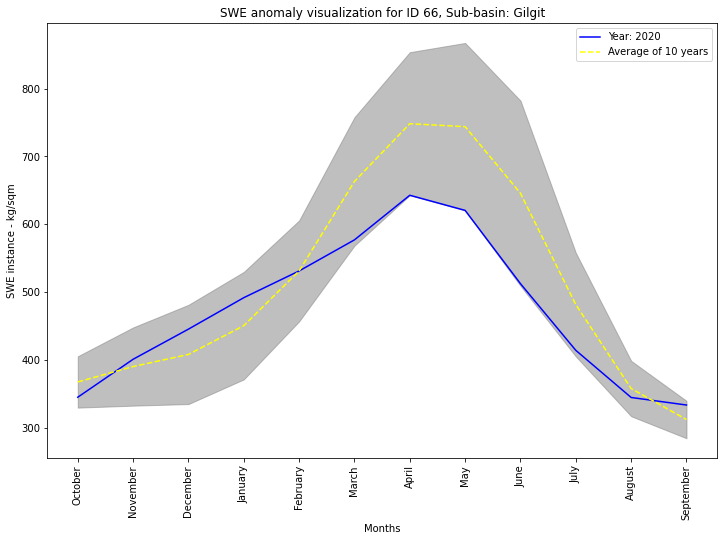

<Figure size 864x576 with 0 Axes>

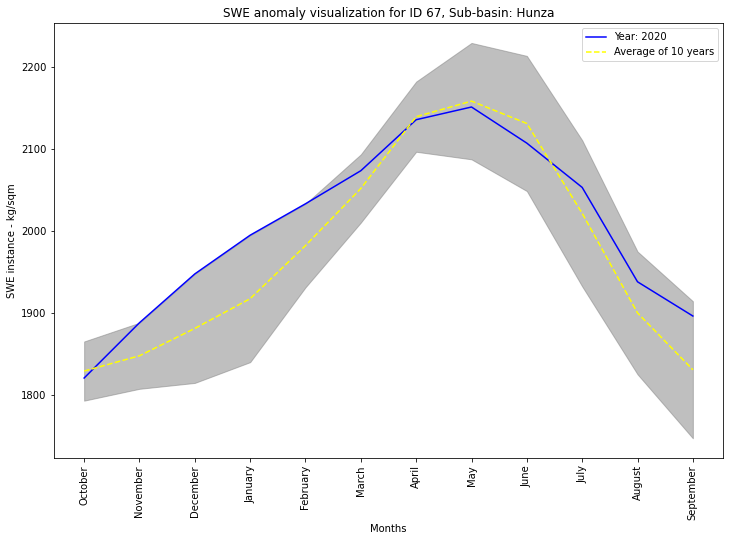

In [33]:
#plotting the ABOVE plots with Input Year to visualize the trend of entered year within 10-year average curves

#For all IDs in 10 year time for data only from required years (excluding Year 2018 and Year 2022)

for i in swe_indus_ids:
    id_check = swe_res_2011_2022[swe_res_2011_2022["ID"]== i]
    plt.figure(figsize=(12,8))
    id_name_check = shp_indus[shp_indus["ID"]==i]
    l3_name = id_name_check["L3_Name"].unique()
    
    plt.figure(figsize=(12,8))
    
    temp_y = []
    
    for year in only_req_years:
        #Year minus 1 [because the dataset folder name starting in year 2011 has 3 month data (oct, nov, dec) from 2010 as well]
        start_date = pd.to_datetime(str(year-1) + "-10-1")
        end_date = pd.to_datetime(str(year) + "-9-30")
        
        year1 = id_check[(id_check['Date'] >= start_date) & (id_check['Date'] <= end_date)]
        x = year1["Month_name"]
        y1 = year1["Mean"]
        temp_y.append(list(y1))

    ###################################################
    
    #Input the YEAR to check anomaly

    year_input = 2020
    
    ###################################################
    
    start_date22 = pd.to_datetime(str(year_input-1) + "-10-1")
    end_date22 = pd.to_datetime(str(year_input) + "-9-30")

    year_to_plot = id_check[(id_check['Date'] >= start_date22) & (id_check['Date'] <= end_date22)]

    x22 = year_to_plot["Month_name"]
    y22 = year_to_plot["Mean"]
    x22_arr = np.array(x22)
    y22_arr = np.array(y22)
    
    plt.plot(x22_arr, y22_arr, color='blue', label= "Year: {}".format(year_input), linestyle ='-')
    
    ###################################################
    
    plt.title("SWE anomaly visualization for ID {}".format(i) + ', ' + "Sub-basin: " + str(l3_name[0]))      
    y_min = np.minimum.reduce(temp_y)
    y_max = np.maximum.reduce(temp_y)
    y_avg = (y_min + y_max)/2
    
#     ana_y = y22_arr - y_avg
    plt.plot(x, y_avg, color='yellow', label= "Average of {}".format(len(only_req_years)) + ' years', linestyle ='--')
    
    plt.fill_between(x, y_min, y_max, color='grey', alpha=0.5)
    plt.xlabel("Months")
    plt.ylabel("SWE instance - kg/sqm")
    plt.xticks(rotation = 90)
    plt.legend() 